「AI創薬・ケモインフォマティクス」第6回「計算機実験2」講義資料2　（講師：小寺正明）

2月19日(金)19:40～21:10

In [ ]:
!date

Thu Feb 18 02:36:48 UTC 2021


# 必要なツールのインストール

In [ ]:
# RDKit installer のインストール
!pip install git+https://github.com/maskot1977/rdkit_installer.git

# RDKitのインストール
from rdkit_installer import install
install.from_miniconda()

# Optuna のインストール
!pip install optuna

# ScikitAllStars のインストール
!pip install git+https://github.com/maskot1977/scikitallstars.git

# SHAP のインストール
# !pip install shap  # 今回は使わない

# UMAP のインストール
!pip3 install umap-learn

# mordredのインストール
!pip install mordred

  Cloning https://github.com/maskot1977/rdkit_installer.git to /tmp/pip-req-build-vl_qcs0r
  Running command git clone -q https://github.com/maskot1977/rdkit_installer.git /tmp/pip-req-build-vl_qcs0r
  Created wheel for rdkit-installer: filename=rdkit_installer-0.1.0-cp36-none-any.whl size=4522 sha256=a5ba8cc4ef2347a27c9c68424bbd6b7b4264a0c663d5d858c02f49a90b83dda9
  Stored in directory: /tmp/pip-ephem-wheel-cache-hbhjjt3x/wheels/22/35/68/f3dcba76a2c9080c925b783ddf87a69f63521e0378721aec73
Successfully built rdkit-installer


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.03.3 installation finished!


     |████████████████████████████████| 296kB 7.7MB/s 
     |████████████████████████████████| 1.1MB 13.9MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 481kB 43.3MB/s 
     |████████████████████████████████| 112kB 40.7MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 143kB 30.7MB/s 
  Created wheel for alembic: filename=alembic-1.5.4-py2.py3-none-any.whl size=156314 sha256=3a0a2d2aaadbe02b723d8e2f957b2aca60e375226cd3fe6cdcabd1d068c0d5be
  Stored in directory: /root/.cache/pip/wheels/fd/2d/ec/5a1b1e2363ed68392d292d215facf588d5448198edd8078bc1
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=f63bd784a2558e1af330ff1c52c307ab5e4cab9b5ce32cebb92ef6a442595df3
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for pyperclip: filename=pyperclip-1.8.1-cp36-none-any.whl size=11120 sha256=

In [ ]:
!date

Thu Feb 18 02:38:37 UTC 2021


# 化合物データのダウンロード

In [ ]:
import urllib.request

# 化合物データのダウンロード
url = "https://raw.githubusercontent.com/maskot1977/tmd2020/main/data/data_1.csv"
urllib.request.urlretrieve(url, url.split("/")[-1])

('data_1.csv', <http.client.HTTPMessage at 0x7f46261d5b00>)

In [ ]:
import pandas as pd

# csvからのデータ読み込み
df = pd.read_csv('data_1.csv')
df

PCCDB-ID  ... Melting point
0       15493  ...         43.79
1       20139  ...         40.29
2        7039  ...         95.04
3       18597  ...         51.64
4       23204  ...         44.94
..        ...  ...           ...
628     12787  ...        171.05
629      3840  ...        101.42
630       675  ...        120.11
631     18598  ...         51.64
632     36911  ...        101.95

[633 rows x 20 columns]

In [ ]:
!date

Thu Feb 18 02:38:38 UTC 2021


# RDKit descriptors の計算

In [ ]:
from rdkit_installer.descriptors import calc_descriptors

rdkit_descriptors_df = calc_descriptors(df['Open Babel SMILES'])
rdkit_descriptors_df

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane  fr_urea
0         12.203893       -0.011059  ...                 0        0
1          8.990151        0.150741  ...                 0        0
2          9.393241       -0.207824  ...                 0        0
3          9.119284        0.353611  ...                 0        0
4          2.401620        0.311389  ...                 0        0
..              ...             ...  ...               ...      ...
628        8.990463       -0.446481  ...                 0        0
629       10.577593       -0.546019  ...                 0        0
630        4.165093        1.049167  ...                 0        0
631        9.567963        0.398056  ...                 0        0
632       10.518632       -0.384815  ...                 0        0

[633 rows x 200 columns]

# Mordred descriptors の計算

In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

calc = Calculator(descriptors)
mordred_descriptors_df = calc.pandas([Chem.MolFromSmiles(smile) for smile in df['Open Babel SMILES']])
mordred_descriptors_df

100%|██████████| 633/633 [02:47<00:00,  3.79it/s]


ABC      ABCGG  nAcid  nBase  ...  Zagreb1  Zagreb2  mZagreb1  mZagreb2
0    12.555834  11.602561      0      1  ...     80.0     89.0  7.916667  3.833333
1     8.025464   7.826624      0      0  ...     52.0     59.0  5.194444  2.555556
2     8.623181   8.454283      0      0  ...     56.0     64.0  5.444444  2.888889
3     8.134854   7.770338      0      0  ...     52.0     58.0  5.194444  2.472222
4    11.143219   9.394819      0      0  ...     70.0     74.0  6.284722  3.333333
..         ...        ...    ...    ...  ...      ...      ...       ...       ...
628   8.163363   8.029752      0      0  ...     54.0     63.0  5.805556  2.444444
629   7.249407   6.952976      0      0  ...     46.0     51.0  4.333333  2.361111
630   8.623181   8.048055      0      0  ...     58.0     68.0  3.694444  2.388889
631   8.094413   7.861189      0      0  ...     52.0     59.0  5.194444  2.500000
632   8.910910   8.632017      0      0  ...     58.0     66.0  6.055556  2.666667

[633 rows x 1826 columns]

# 各種 Fingerprint の計算

In [ ]:
from rdkit_installer.fingerprints import Fingerprinter

fingerprinter = Fingerprinter()
fingerprinter.names()

['MACCSkeys',
 'Avalon',
 'Morgan2(1024bits)',
 'Morgan2F(1024bits)',
 'Morgan4(2048bits)',
 'Morgan4F(2048bits)',
 'ECFP2',
 'FCFP2',
 'ECFP4',
 'FCFP4',
 'ECFP6',
 'FCFP6']

In [ ]:
fp_type = "MACCSkeys"
matrix = []
for vec in fingerprinter.transform(df['Open Babel SMILES'][:10], fp_type=fp_type):
    matrix.append(vec)

pd.DataFrame(matrix)

0    1    2    3    4    5    6    ...  160  161  162  163  164  165  166
0    0    0    0    0    0    0    0  ...    1    1    0    0    1    1    0
1    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
2    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
3    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
4    0    0    0    0    0    0    0  ...    1    0    0    0    0    1    0
5    0    0    0    0    0    0    0  ...    1    1    1    1    1    1    0
6    0    0    0    0    0    0    0  ...    1    0    1    1    1    1    0
7    0    0    0    0    0    0    0  ...    0    0    0    0    1    1    0
8    0    0    0    0    0    0    0  ...    1    1    1    1    0    1    0
9    0    0    0    0    0    0    0  ...    1    1    1    1    1    1    0

[10 rows x 167 columns]

In [ ]:
fp_type = "ECFP2"
matrix = []
for vec in fingerprinter.transform(df['Open Babel SMILES'][:10], fp_type=fp_type):
    matrix.append(vec)

pd.DataFrame(matrix, columns=fingerprinter.all_bit_info_keys[fp_type])

2076190208  2245273601  3925172229  ...  4086265842  2976033787  3777168895
0           0           0           1  ...           0           1           0
1           0           0           0  ...           1           0           0
2           0           0           0  ...           0           0           0
3           0           1           0  ...           0           0           0
4           0           0           0  ...           0           0           0
5           1           0           0  ...           1           0           0
6           0           0           0  ...           0           0           0
7           0           1           0  ...           0           1           0
8           0           0           0  ...           0           0           1
9           0           0           0  ...           0           0           0

[10 rows x 95 columns]

In [ ]:
fp_dfs = []
for name in fingerprinter.names():
    fp_df = pd.DataFrame([vec for vec in fingerprinter.transform(df['Open Babel SMILES'], fp_type=name)])
    if name in fingerprinter.all_bit_info_keys.keys():
        fp_df.columns=fingerprinter.all_bit_info_keys[name]

    print(name, fp_df.shape)
    fp_dfs.append(fp_df)

MACCSkeys (633, 167)
Avalon (633, 512)
Morgan2(1024bits) (633, 1024)
Morgan2F(1024bits) (633, 1024)
Morgan4(2048bits) (633, 2048)
Morgan4F(2048bits) (633, 2048)
ECFP2 (633, 693)
FCFP2 (633, 207)
ECFP4 (633, 3128)
FCFP4 (633, 1450)
ECFP6 (633, 6508)
FCFP6 (633, 4110)


In [ ]:
!date

Thu Feb 18 02:41:45 UTC 2021


# 前処理としての特徴選択と正規化

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold() # Removing features with low variance

fp_dfs = []
for name in fingerprinter.names():
    fp_df = pd.DataFrame([vec for vec in fingerprinter.transform(df['Open Babel SMILES'], fp_type=name)])
    fp_df = pd.DataFrame(sel.fit_transform(fp_df)).apply(lambda x: (x-x.mean())/x.std(), axis=0)
    if name in fingerprinter.all_bit_info_keys.keys():
        fp_df.columns=fingerprinter.all_bit_info_keys[name]
        
    print(name, fp_df.shape)
    fp_dfs.append(fp_df)

MACCSkeys (633, 133)
Avalon (633, 511)
Morgan2(1024bits) (633, 970)
Morgan2F(1024bits) (633, 768)
Morgan4(2048bits) (633, 2002)
Morgan4F(2048bits) (633, 1912)
ECFP2 (633, 693)
FCFP2 (633, 207)
ECFP4 (633, 3128)
FCFP4 (633, 1450)
ECFP6 (633, 6508)
FCFP6 (633, 4110)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold() # Removing features with low variance
rdkit_descriptors_df2 = pd.DataFrame(
    sel.fit_transform(rdkit_descriptors_df), 
    columns=[rdkit_descriptors_df.columns[i] for i, var in enumerate(sel.variances_) if var != 0]
    ).apply(lambda x: (x-x.mean())/x.std(), axis=0)
rdkit_descriptors_df2

MaxEStateIndex  MinEStateIndex  ...  fr_unbrch_alkane   fr_urea
0          1.274376       -0.158629  ...         -0.092107 -0.126594
1          0.280126        0.061761  ...         -0.092107 -0.126594
2          0.404832       -0.426646  ...         -0.092107 -0.126594
3          0.320077        0.338094  ...         -0.092107 -0.126594
4         -1.758197        0.280583  ...         -0.092107 -0.126594
..              ...             ...  ...               ...       ...
628        0.280223       -0.751725  ...         -0.092107 -0.126594
629        0.771240       -0.887307  ...         -0.092107 -0.126594
630       -1.212624        1.285523  ...         -0.092107 -0.126594
631        0.458886        0.398633  ...         -0.092107 -0.126594
632        0.752999       -0.667728  ...         -0.092107 -0.126594

[633 rows x 173 columns]

In [ ]:
import numpy as np

ok_id = []
for colid, col in enumerate(mordred_descriptors_df.values.T):
    try:
        if np.var(col) != 0:
            ok_id.append(colid)
    except:
        pass

mordred_descriptors_df2 = mordred_descriptors_df.iloc[:, ok_id].apply(lambda x: (x-x.mean())/x.std(), axis=0)
mordred_descriptors_df2

ABC     ABCGG     nAcid  ...   Zagreb2  mZagreb1  mZagreb2
0    1.279317  1.381674 -0.260665  ...  0.771410  1.769327  1.306557
1   -0.922325 -0.857132 -0.260665  ... -0.852476 -0.414062 -0.789607
2   -0.631850 -0.484984 -0.260665  ... -0.581829 -0.213547 -0.242782
3   -0.869165 -0.890505 -0.260665  ... -0.906606 -0.414062 -0.926313
4    0.592823  0.072672 -0.260665  ... -0.040533  0.460407  0.486319
..        ...       ...       ...  ...       ...       ...       ...
628 -0.855310 -0.736695 -0.260665  ... -0.635958  0.076086 -0.971882
629 -1.299468 -1.375130 -0.260665  ... -1.285513 -1.104726 -1.108588
630 -0.631850 -0.725843 -0.260665  ... -0.365310 -1.617154 -1.063019
631 -0.888817 -0.836638 -0.260665  ... -0.852476 -0.414062 -0.880744
632 -0.492021 -0.379603 -0.260665  ... -0.473569  0.276602 -0.607332

[633 rows x 1096 columns]

In [ ]:
!date

Thu Feb 18 02:42:10 UTC 2021


# トレーニングデータ、テストデータへの分割

In [ ]:
import random

test_size = 0.2
ids = [id for id in range(len(df))]
random.shuffle(ids)
split_line = int(len(df) * (1 - test_size))
train_ids = ids[:split_line]
test_ids = ids[split_line:]

y_train, y_test = df.iloc[train_ids, :], df.iloc[test_ids, :]

X_trains = []
X_tests = []
for fp_df in fp_dfs:
    X_trains.append(fp_df.iloc[train_ids, :])
    X_tests.append(fp_df.iloc[test_ids, :])

X_train_rdkit, X_test_rdkit = rdkit_descriptors_df2.iloc[train_ids, :], rdkit_descriptors_df2.iloc[test_ids, :]
X_train_mordred, X_test_mordred = mordred_descriptors_df2.iloc[train_ids, :], mordred_descriptors_df2.iloc[test_ids, :]

# Objective 2 : HOMO-LUMO gap

## RandomForest を用いた特徴選択

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.feature_selection import SelectFromModel

def random_forest_feature_selector(X_train, y_train, X_test):
    objective = all_sklearn.Objective(X_train, y_train)
    objective.set_model_names(['RandomForest'])

    optuna.logging.set_verbosity(optuna.logging.WARN)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, timeout=100, n_trials=20, show_progress_bar=False)

    selector = SelectFromModel(estimator=objective.best_model.model).fit(X_train, y_train)

    return X_train.iloc[:, selector.get_support()], X_test.iloc[:, selector.get_support()], objective.best_model.model.feature_importances_[selector.get_support()]

In [ ]:
 X_train_rdkit1, X_test_rdkit1, feature_importance_rdkit1 = random_forest_feature_selector(X_train_rdkit, y_train['HOMO-LUMO gap'], X_test_rdkit)
 print("RDKit descriptors", X_train_rdkit.shape, "->", X_train_rdkit1.shape)

RDKit descriptors (506, 173) -> (506, 25)


In [ ]:
X_train_mordred1, X_test_mordred1, feature_importance_mordred1 = random_forest_feature_selector(X_train_mordred, y_train['HOMO-LUMO gap'], X_test_mordred)
print("Mordred descriptors", X_train_mordred.shape, "->", X_train_mordred1.shape)

Mordred descriptors (506, 1096) -> (506, 152)


In [ ]:
import numpy as np
import optuna
from scikitallstars import all_sklearn

def random_forest_feature_selector_fp(X_train, y_train, X_test):
    objective = all_sklearn.Objective(X_train, y_train)
    objective.set_model_names(['RandomForest'])

    optuna.logging.set_verbosity(optuna.logging.WARN)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, timeout=100, n_trials=20, show_progress_bar=False)

    selected = np.where(objective.best_model.model.feature_importances_ == 0, False, True)

    return X_train.iloc[:, selected], X_test.iloc[:, selected], objective.best_model.model.feature_importances_[selected]

In [ ]:
X_trains1_selected = []
X_tests1_selected = []
feature_importances = []
for X_train, X_test, name in zip(X_trains, X_tests, fingerprinter.names()):
    X_train1, X_test1, feature_importance = random_forest_feature_selector_fp(X_train, y_train['HOMO-LUMO gap'], X_test)
    X_trains1_selected.append(X_train1)
    X_tests1_selected.append(X_test1)
    feature_importances.append(feature_importance)
    print(name, X_train.shape, "->", X_train1.shape)

MACCSkeys (506, 133) -> (506, 128)
Avalon (506, 511) -> (506, 508)
Morgan2(1024bits) (506, 970) -> (506, 889)
Morgan2F(1024bits) (506, 768) -> (506, 681)
Morgan4(2048bits) (506, 2002) -> (506, 1815)
Morgan4F(2048bits) (506, 1912) -> (506, 1667)
ECFP2 (506, 693) -> (506, 585)
FCFP2 (506, 207) -> (506, 193)
ECFP4 (506, 3128) -> (506, 2173)
FCFP4 (506, 1450) -> (506, 1053)
ECFP6 (506, 6508) -> (506, 3806)
FCFP6 (506, 4110) -> (506, 2727)


RDKit descriptor (506, 25)


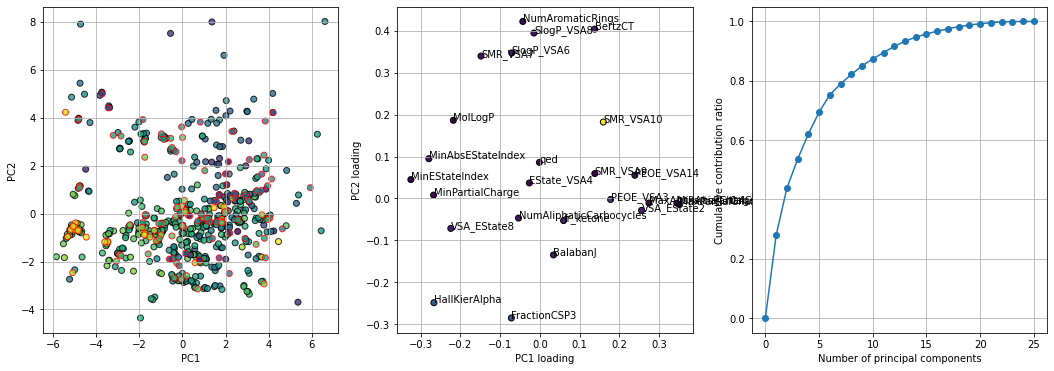

Mordred descriptor (506, 152)


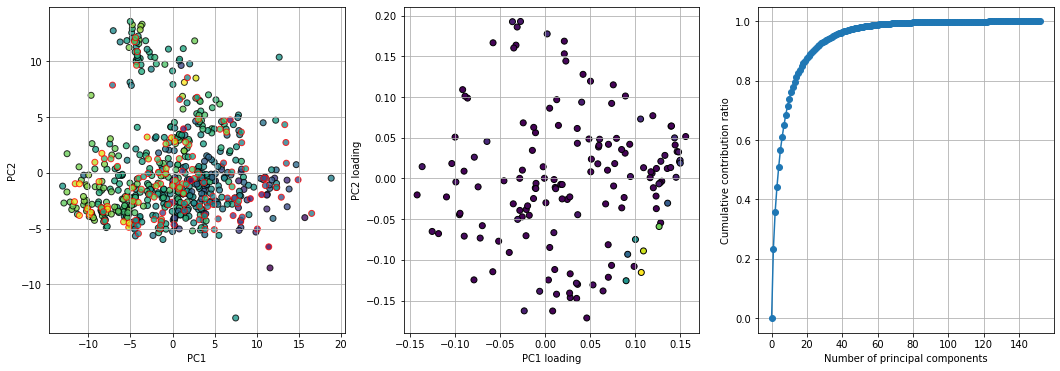

MACCSkeys (506, 128)


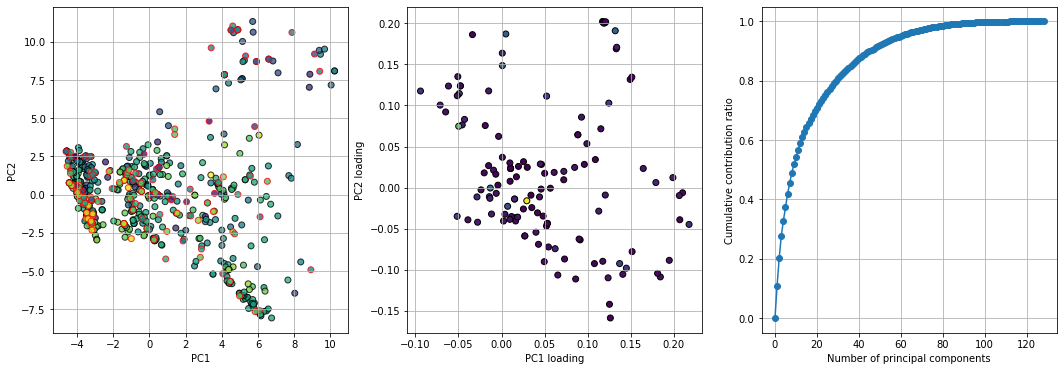

Avalon (506, 508)


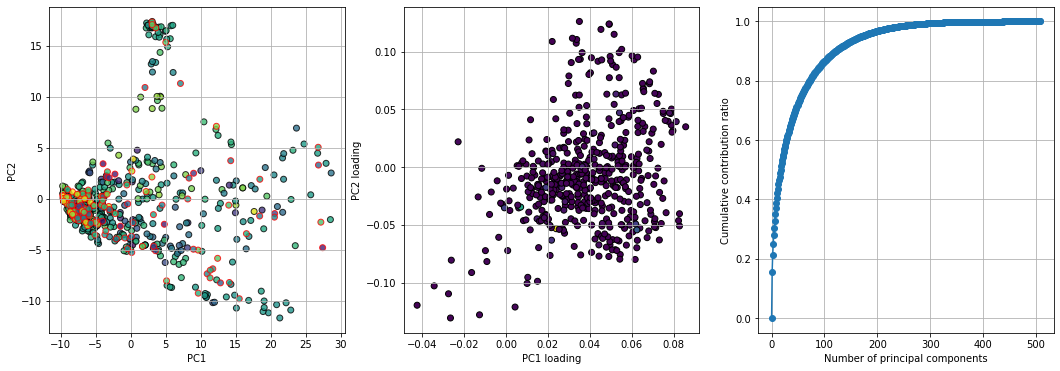

Morgan2(1024bits) (506, 889)


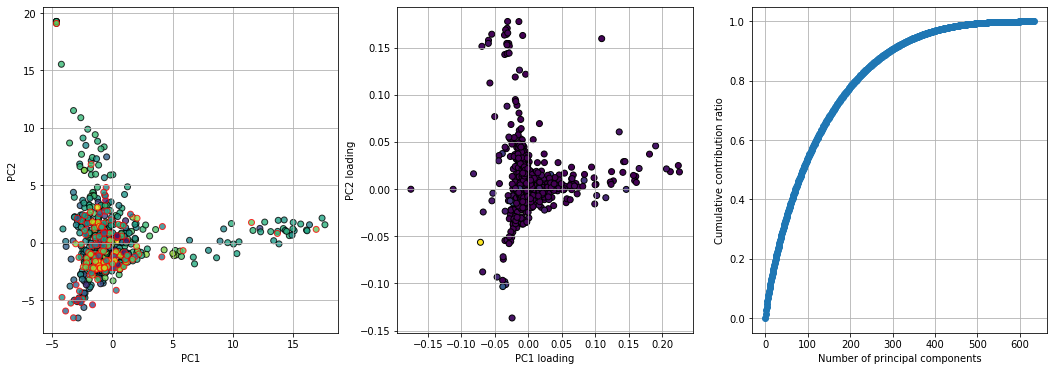

Morgan2F(1024bits) (506, 681)


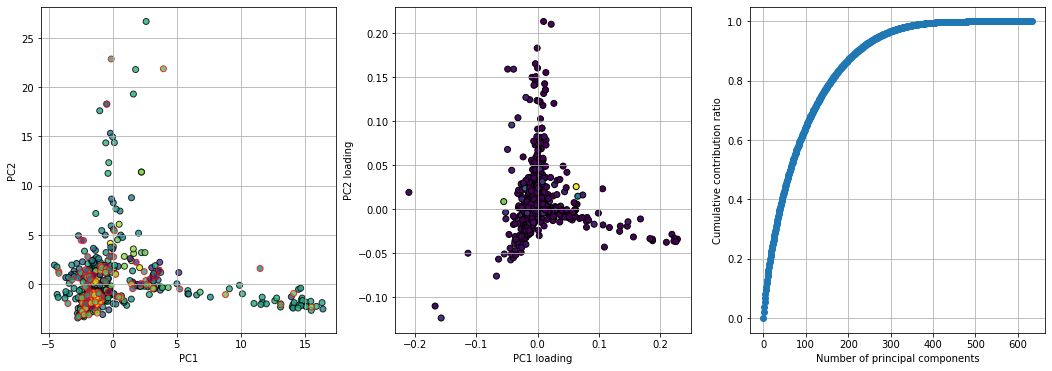

Morgan4(2048bits) (506, 1815)


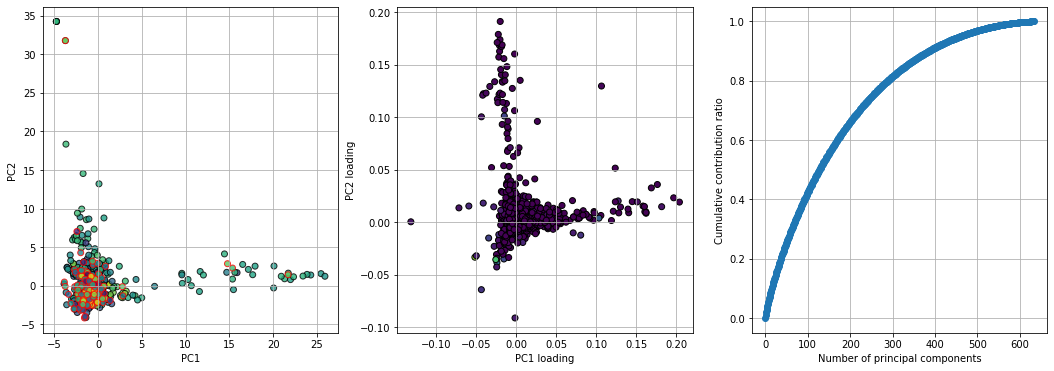

Morgan4F(2048bits) (506, 1667)


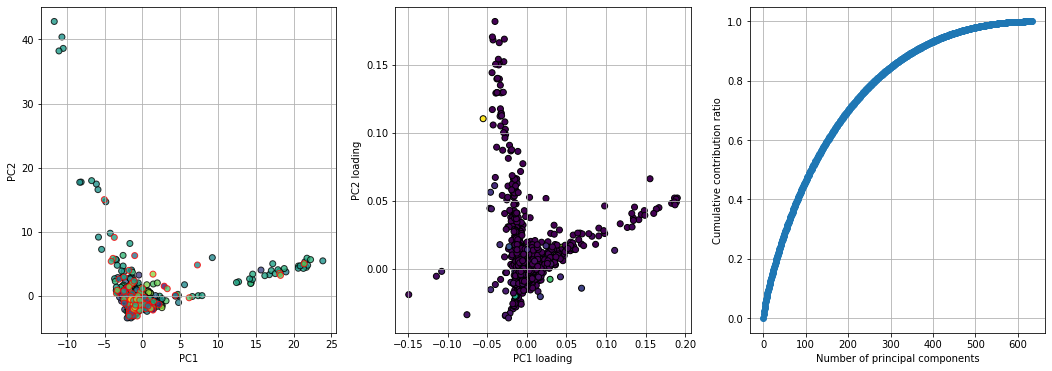

ECFP2 (506, 585)


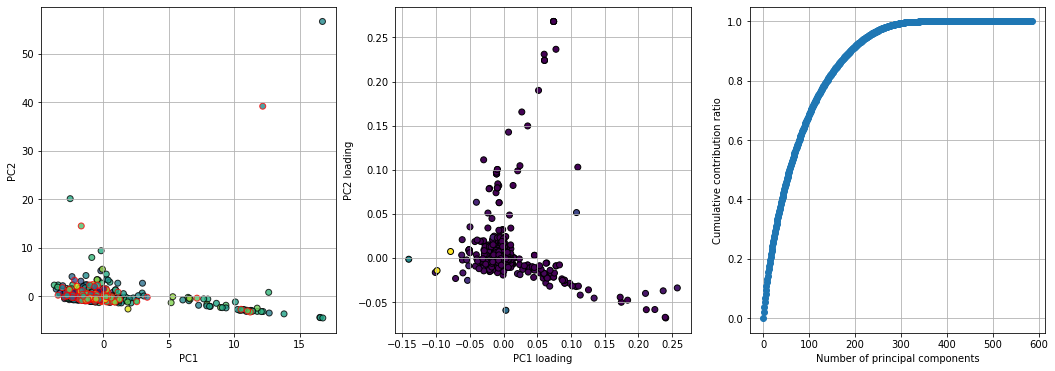

FCFP2 (506, 193)


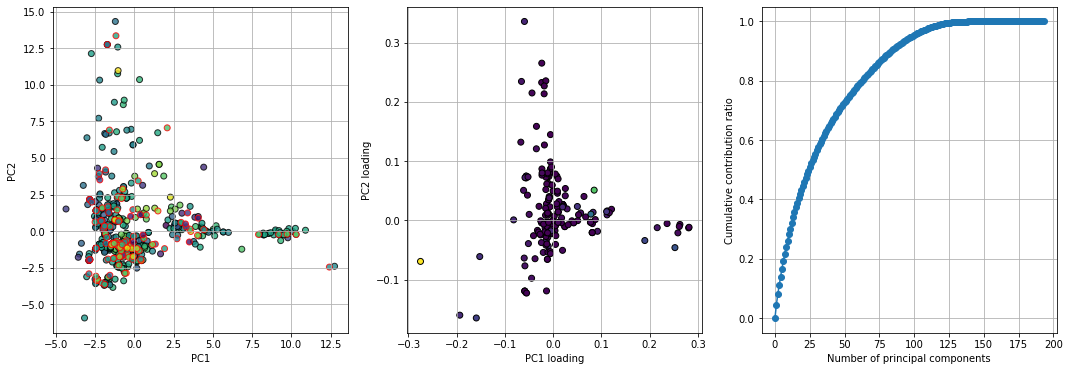

ECFP4 (506, 2173)


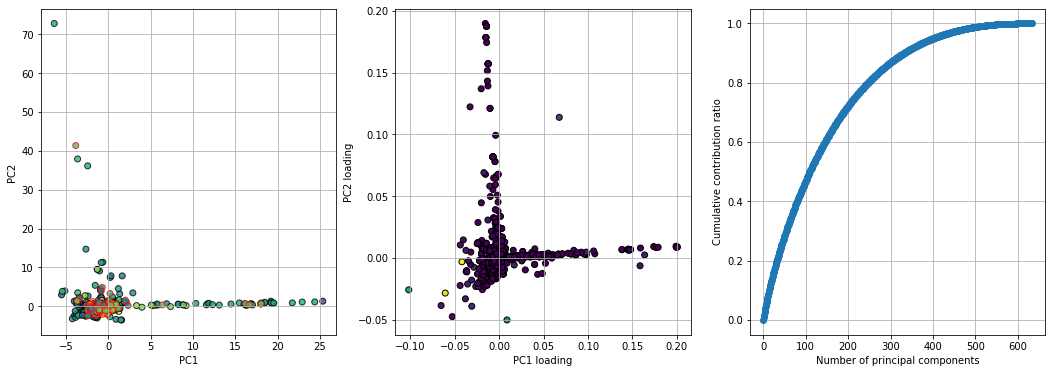

FCFP4 (506, 1053)


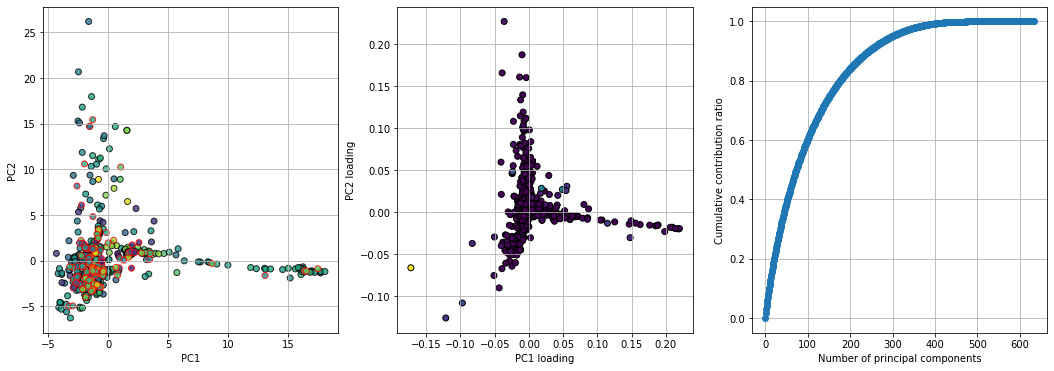

ECFP6 (506, 3806)


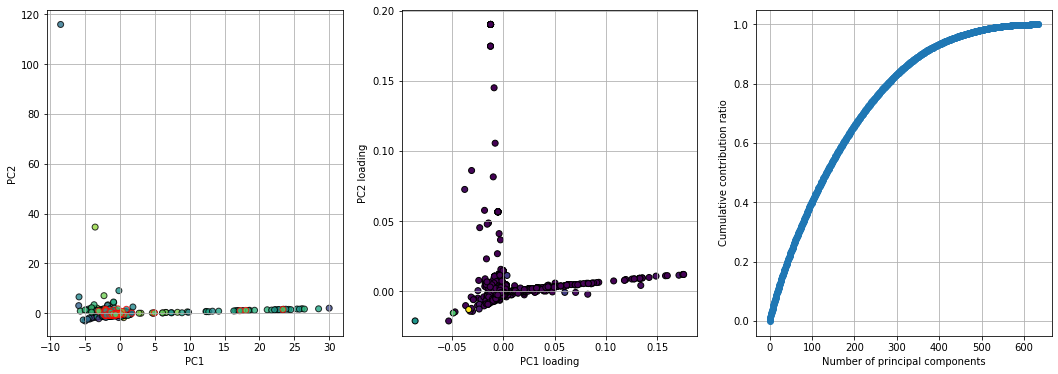

FCFP6 (506, 2727)


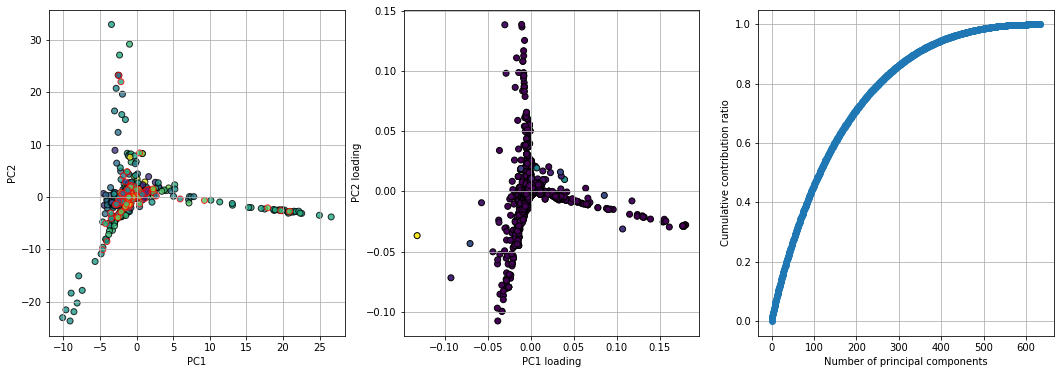

In [ ]:
pcaumap1s = []
for X_train1, X_test1, name, feature_importance in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    ["RDKit descriptor", "Mordred descriptor"] + fingerprinter.names(),
    [feature_importance_rdkit1, feature_importance_mordred1] + feature_importances):

    print(name, X_train1.shape)
    pcaumap1 = all_sklearn.PCAUmap()
    pcaumap1.fit(pd.concat([X_train1, X_test1]))
    pcaumap1s.append(pcaumap1)
    all_sklearn.pca_summary(
        pcaumap1.pca, 
        X_train1, 
        y_train['HOMO-LUMO gap'], 
        X_test1, 
        y_test=y_test['HOMO-LUMO gap'],
        loading_color=feature_importance
        )

RDKit descriptors
inside function
   (0, 0)	1.0
  (0, 8)	0.26768863
  (0, 17)	0.284162
  (0, 53)	0.26742756
  (0, 141)	0.27335528
  (0, 152)	0.26813668
  (0, 191)	0.2941675
  (0, 200)	0.2774899
  (0, 202)	0.2684266
  (0, 269)	0.28767198
  (0, 330)	0.2803563
  (0, 459)	0.28112516
  (0, 476)	0.2970379
  (0, 527)	0.2794422
  (0, 587)	0.28040624
  (1, 1)	1.0
  (1, 75)	0.41958046
  (1, 91)	0.1899172
  (1, 98)	0.4245304
  (1, 106)	0.42592245
  (1, 118)	0.17291597
  (1, 124)	0.26567787
  (1, 166)	0.21340314
  (1, 229)	0.22577569
  (1, 251)	0.23539191
  :	:
  (504, 169)	0.1341373
  (504, 192)	0.12219267
  (504, 305)	0.116231084
  (504, 336)	0.12436682
  (504, 338)	0.1376668
  (504, 384)	0.9185342
  (504, 400)	0.14487824
  (504, 504)	1.0
  (504, 542)	0.11196716
  (504, 581)	0.2141206
  (505, 6)	0.3185008
  (505, 88)	0.19021662
  (505, 103)	0.4719365
  (505, 115)	0.2659484
  (505, 122)	0.20786148
  (505, 147)	0.17740814
  (505, 192)	0.17062671
  (505, 261)	0.53873694
  (505, 277)	0.42449746
  (5

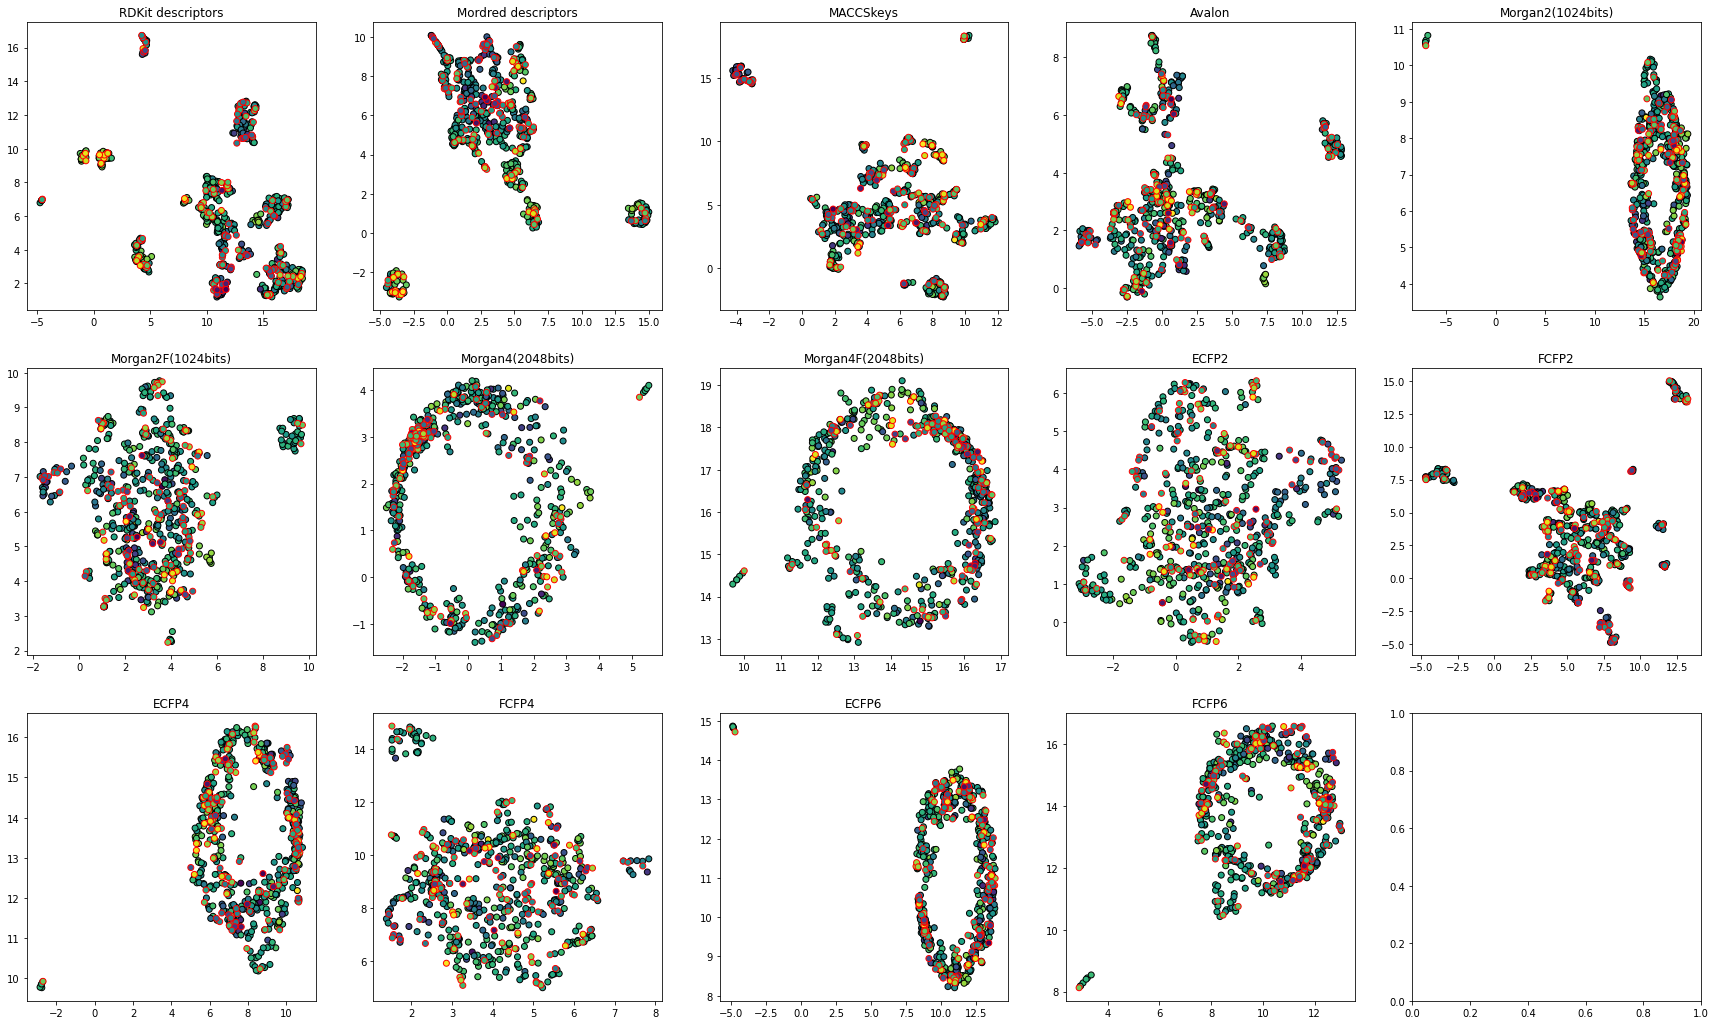

In [ ]:
import matplotlib.pyplot as plt
nrows, ncols = 3, 5
fig, axes = plt.subplots(
            nrows=nrows,
            ncols=ncols,
            figsize=(6*ncols, 6*nrows),
        )
i_ax = 0
for X_train1, X_test1, pcaumap1, name in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    pcaumap1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    embed_train1 = pcaumap1.transform(X_train1)
    embed_test1 = pcaumap1.transform(X_test1)
    axes[int(i_ax/ncols)][i_ax%ncols].set_title(name)
    axes[int(i_ax/ncols)][i_ax%ncols].scatter(embed_train1[:, 0], embed_train1[:, 1], edgecolors="k", c=y_train['HOMO-LUMO gap'])
    axes[int(i_ax/ncols)][i_ax%ncols].scatter(embed_test1[:, 0], embed_test1[:, 1], edgecolors="r", c=y_test['HOMO-LUMO gap'])
    i_ax += 1

plt.show()

In [ ]:
!date

# 選択された特徴の可視化

In [ ]:
import random
from rdkit.Chem.Draw import DrawMorganBits, IPythonConsole

def depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20):
    fp_tuples = []
    legends = []
    for i in np.argsort(feature_importances[fingerprinter.names().index(fp_type)])[::-1]:
        bit = fingerprinter.all_bit_info_keys[fp_type][i]
        #print(i, feature_importances[fingerprinter.names().index(fp_type)][i], bit)

        j_index = [j for j in range(len(fingerprinter.bit_infos[fp_type]))]
        random.shuffle(j_index)
        for j in j_index:
            bit_info = fingerprinter.bit_infos[fp_type][j]
            if bit in bit_info.keys():
                fp_tuples.append((fingerprinter.mols[j], bit, bit_info))
                legends.append(str(bit))
                break

        if len(fp_tuples) >= n_depict:
            break

    return fp_tuples, legends

In [ ]:
fingerprinter.names()

['MACCSkeys',
 'Avalon',
 'Morgan2(1024bits)',
 'Morgan2F(1024bits)',
 'Morgan4(2048bits)',
 'Morgan4F(2048bits)',
 'ECFP2',
 'FCFP2',
 'ECFP4',
 'FCFP4',
 'ECFP6',
 'FCFP6']

In [ ]:
fp_type = "ECFP2"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

In [ ]:
fp_type = "FCFP2"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

In [ ]:
fp_type = "ECFP4"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

In [ ]:
fp_type = "FCFP4"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

In [ ]:
fp_type = "ECFP6"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

In [ ]:
fp_type = "FCFP6"
fp_tuples, legends = depict_fp(fp_type, fingerprinter, feature_importances, n_depict=20)
DrawMorganBits(fp_tuples, molsPerRow=5, legends=legends)

## 選択された特徴を用いた予測

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1_rdkit = all_sklearn.Objective(X_train_rdkit1, y_train['HOMO-LUMO gap'])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective1_rdkit.get_model_names()
for model_name in model_names:
    objective1_rdkit.set_model_names([model_name])
    study1 = optuna.create_study(direction='maximize')
    study1.optimize(objective1_rdkit, timeout=100, n_trials=25, show_progress_bar=False)

objective1_rdkit.set_model_names(model_names)
#study1 = optuna.create_study(direction='maximize')
#study1.optimize(objective1_rdkit, timeout=100, n_trials=100, show_progress_bar=True)

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1_mordred = all_sklearn.Objective(X_train_mordred1, y_train['HOMO-LUMO gap'])

optuna.logging.set_verbosity(optuna.logging.WARN)
model_names = objective1_mordred.get_model_names()
for model_name in model_names:
    objective1_mordred.set_model_names([model_name])
    study1 = optuna.create_study(direction='maximize')
    study1.optimize(objective1_mordred, timeout=100, n_trials=25, show_progress_bar=False)

objective1_mordred.set_model_names(model_names)
#study1 = optuna.create_study(direction='maximize')
#study1.optimize(objective1_mordred, timeout=100, n_trials=100, show_progress_bar=True)

In [ ]:
import optuna
from scikitallstars import all_sklearn
from sklearn.model_selection import train_test_split

objective1s = []
for X_train1, X_test1, name in zip(X_trains1_selected, X_tests1_selected, fingerprinter.names()):
    objective1 = all_sklearn.Objective(X_train1, y_train['HOMO-LUMO gap'])

    optuna.logging.set_verbosity(optuna.logging.WARN)
    model_names = objective1.get_model_names()
    for model_name in model_names:
        print(name, model_name)
        objective1.set_model_names([model_name])
        study1 = optuna.create_study(direction='maximize')
        study1.optimize(objective1, timeout=100, n_trials=25, show_progress_bar=False)

    objective1.set_model_names(model_names)
    #study1 = optuna.create_study(direction='maximize')
    #study1.optimize(objective1, timeout=100, n_trials=25, show_progress_bar=False)

    objective1s.append(objective1)

MACCSkeys GradientBoosting
MACCSkeys RandomForest
MACCSkeys MLP
MACCSkeys SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

MACCSkeys kNN
MACCSkeys Ridge
MACCSkeys Lasso
MACCSkeys PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 112

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 113

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 113

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 113



MACCSkeys LinearRegression
Avalon GradientBoosting
Avalon RandomForest
Avalon MLP
Avalon SVR
Avalon kNN
Avalon Ridge
Avalon Lasso
Avalon PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 375

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 369

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 368

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 375



Avalon LinearRegression
Morgan2(1024bits) GradientBoosting
Morgan2(1024bits) RandomForest
Morgan2(1024bits) MLP
Morgan2(1024bits) SVR
Morgan2(1024bits) kNN
Morgan2(1024bits) Ridge
Morgan2(1024bits) Lasso
Morgan2(1024bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan2(1024bits) LinearRegression
Morgan2F(1024bits) GradientBoosting
Morgan2F(1024bits) RandomForest
Morgan2F(1024bits) MLP
Morgan2F(1024bits) SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Morgan2F(1024bits) kNN
Morgan2F(1024bits) Ridge
Morgan2F(1024bits) Lasso
Morgan2F(1024bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 373

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 369

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 370

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 372

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 369

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 365

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 364

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan2F(1024bits) LinearRegression
Morgan4(2048bits) GradientBoosting
Morgan4(2048bits) RandomForest
Morgan4(2048bits) MLP
Morgan4(2048bits) SVR
Morgan4(2048bits) kNN
Morgan4(2048bits) Ridge
Morgan4(2048bits) Lasso
Morgan4(2048bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan4(2048bits) LinearRegression
Morgan4F(2048bits) GradientBoosting
Morgan4F(2048bits) RandomForest
Morgan4F(2048bits) MLP
Morgan4F(2048bits) SVR
Morgan4F(2048bits) kNN
Morgan4F(2048bits) Ridge
Morgan4F(2048bits) Lasso
Morgan4F(2048bits) PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

Morgan4F(2048bits) LinearRegression
ECFP2 GradientBoosting
ECFP2 RandomForest
ECFP2 MLP
ECFP2 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



ECFP2 kNN
ECFP2 Ridge
ECFP2 Lasso
ECFP2 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 266

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 265

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 268

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 266

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 279

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 264

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 269

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

ECFP2 LinearRegression
FCFP2 GradientBoosting
FCFP2 RandomForest
FCFP2 MLP
FCFP2 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



FCFP2 kNN
FCFP2 Ridge
FCFP2 Lasso
FCFP2 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 127

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 130

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 126

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 127

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 123

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 129



FCFP2 LinearRegression
ECFP4 GradientBoosting
ECFP4 RandomForest
ECFP4 MLP
ECFP4 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

ECFP4 kNN
ECFP4 Ridge
ECFP4 Lasso
ECFP4 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

ECFP4 LinearRegression
FCFP4 GradientBoosting
FCFP4 RandomForest
FCFP4 MLP
FCFP4 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

FCFP4 kNN
FCFP4 Ridge
FCFP4 Lasso
FCFP4 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 346

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 364

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 351

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 352

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 350

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 357

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 357

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

FCFP4 LinearRegression
ECFP6 GradientBoosting
ECFP6 RandomForest
ECFP6 MLP
ECFP6 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



ECFP6 kNN
ECFP6 Ridge
ECFP6 Lasso
ECFP6 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401



'regressor.fit' terminated since it did not finish in 60 second(s).


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 404



ECFP6 LinearRegression
FCFP6 GradientBoosting
FCFP6 RandomForest
FCFP6 MLP
FCFP6 SVR


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

FCFP6 kNN
FCFP6 Ridge
FCFP6 Lasso
FCFP6 PLS


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarnin

FCFP6 LinearRegression


RDKit descriptors


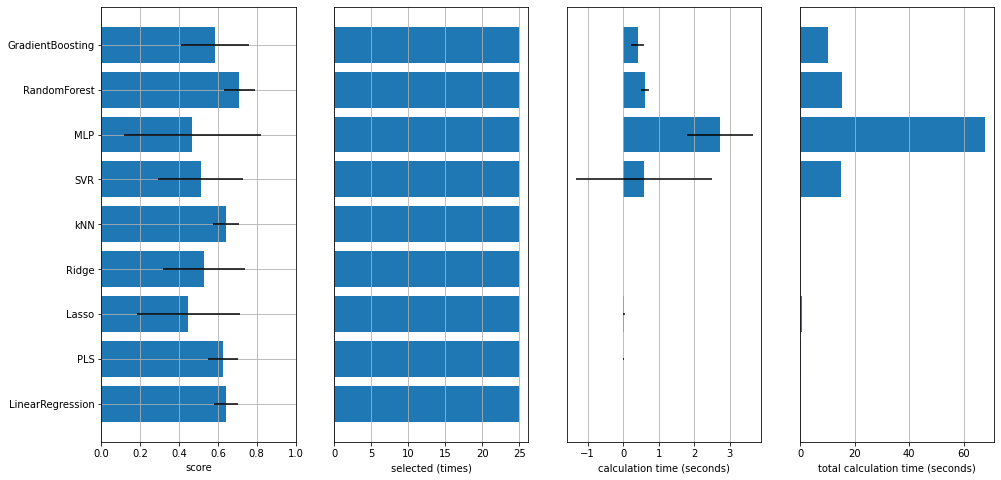

Mordred descriptors


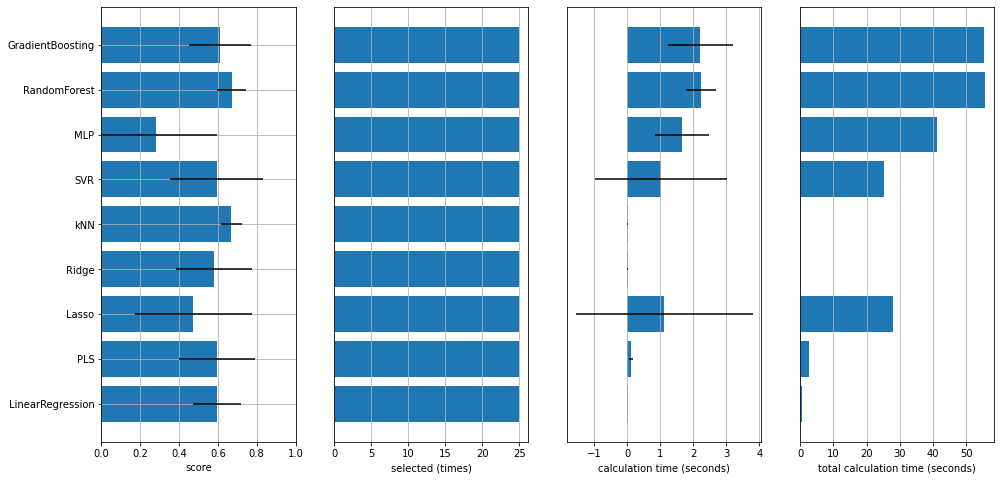

MACCSkeys


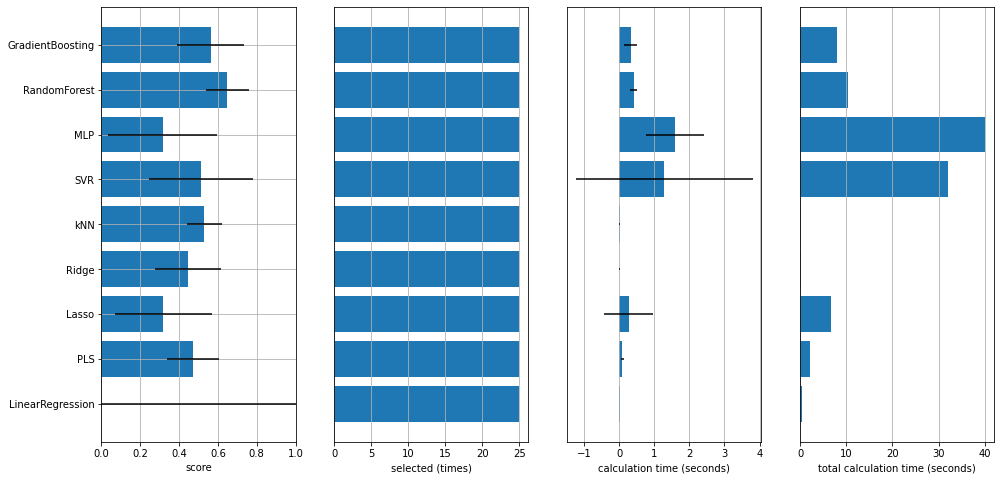

Avalon


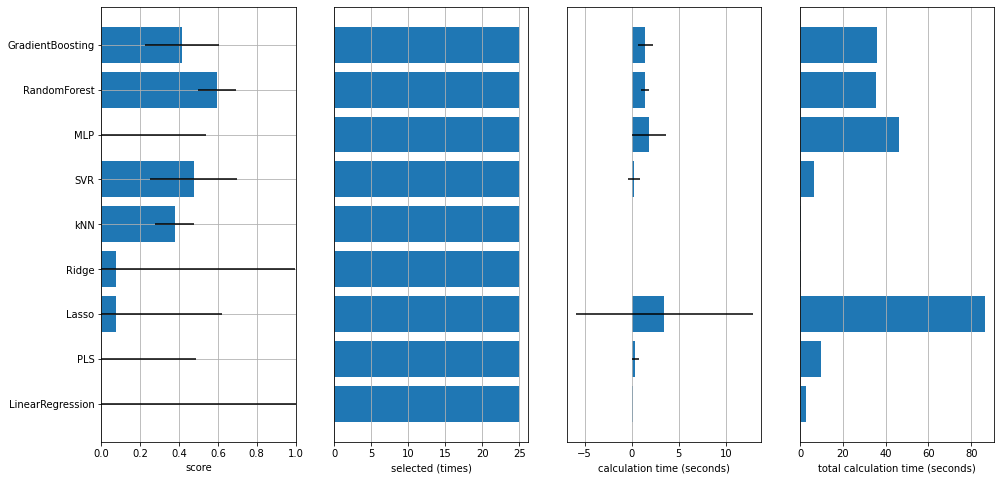

Morgan2(1024bits)


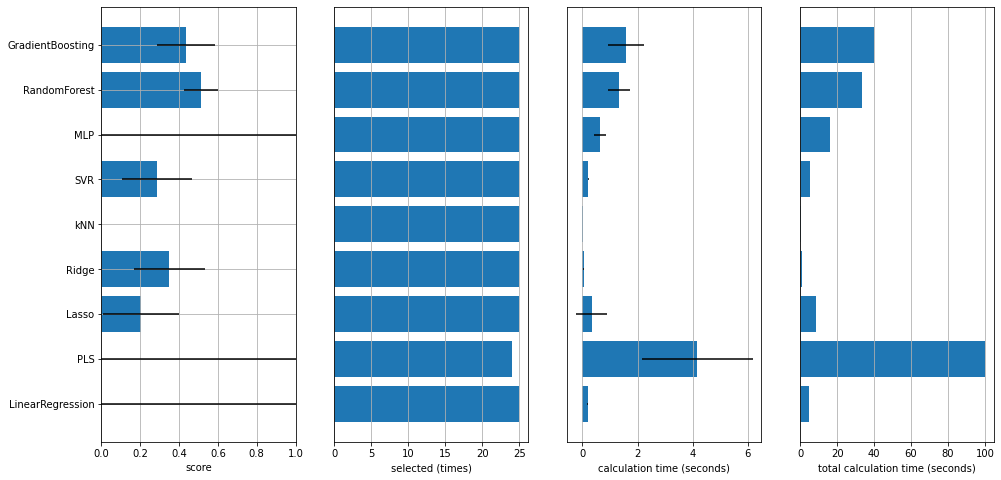

Morgan2F(1024bits)


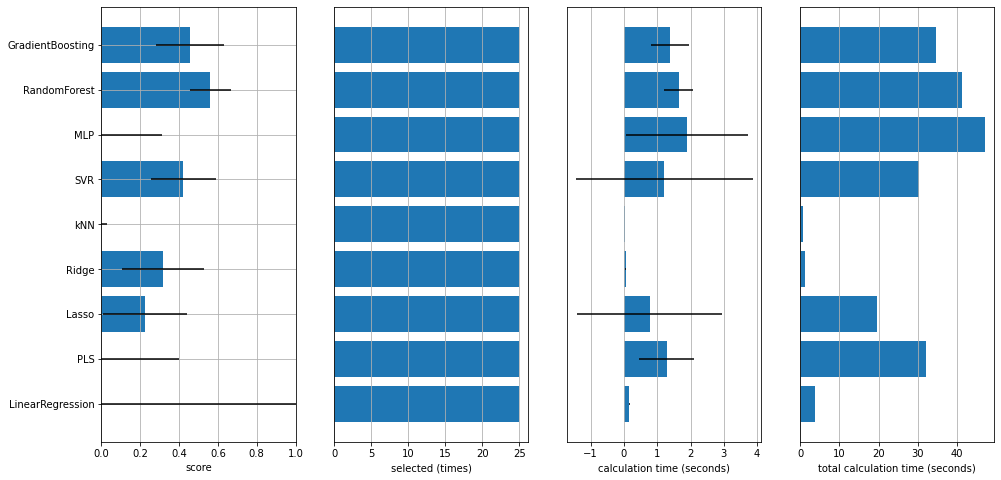

Morgan4(2048bits)


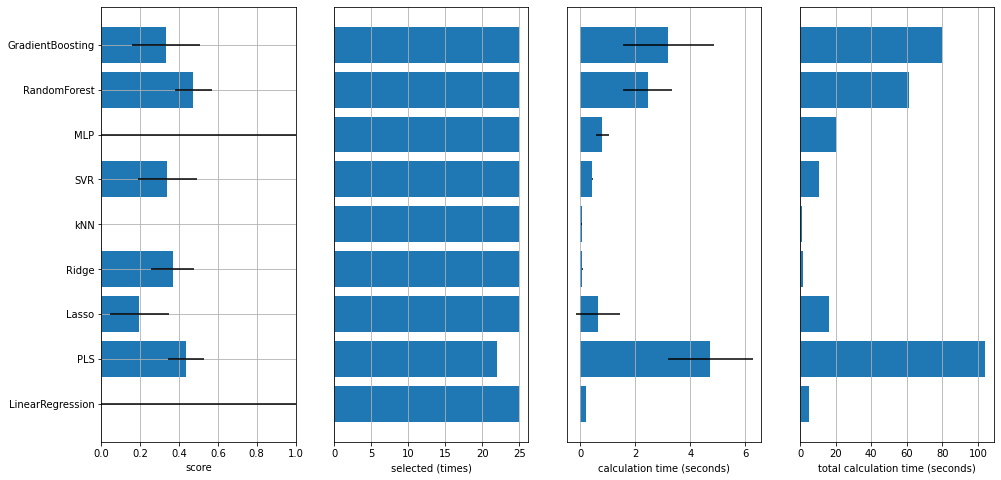

Morgan4F(2048bits)


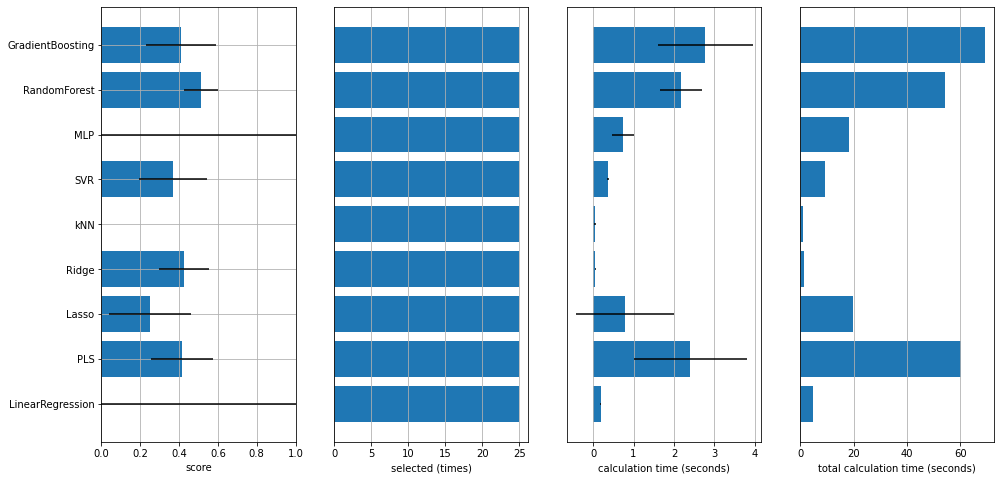

ECFP2


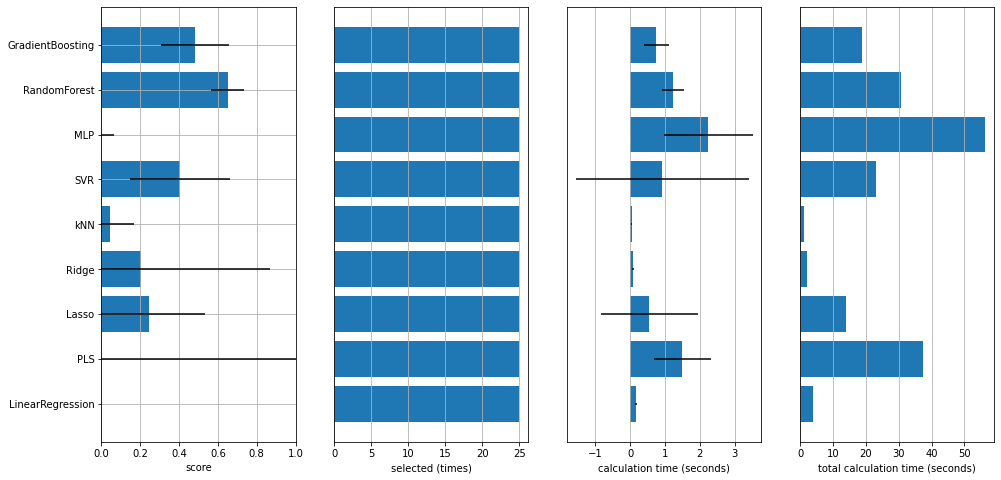

FCFP2


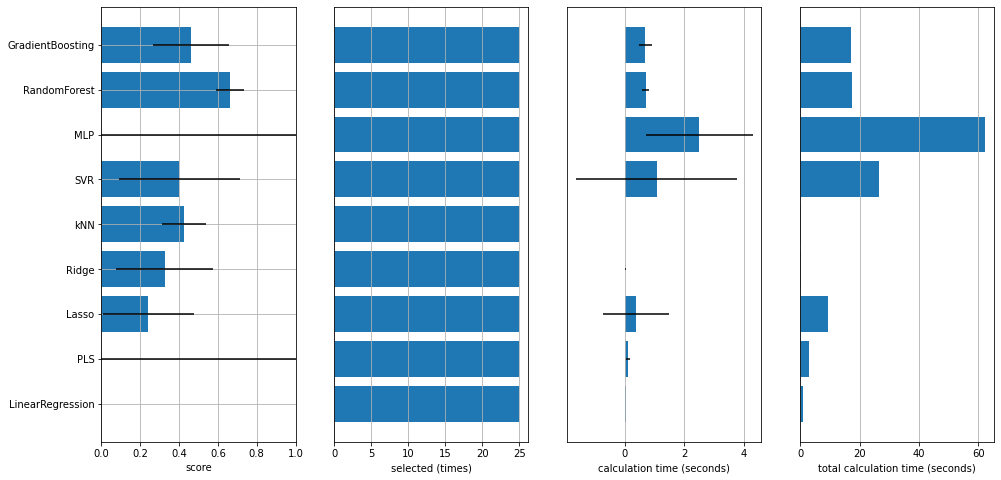

ECFP4


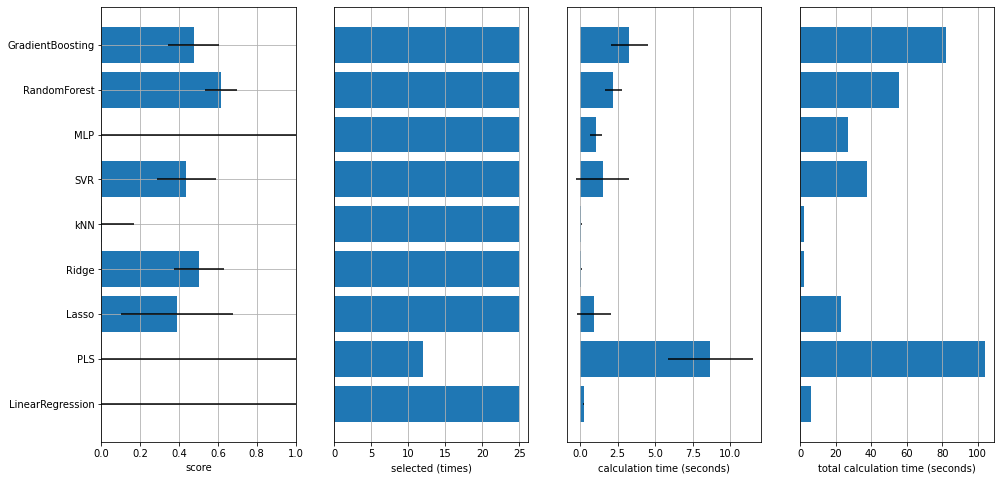

FCFP4


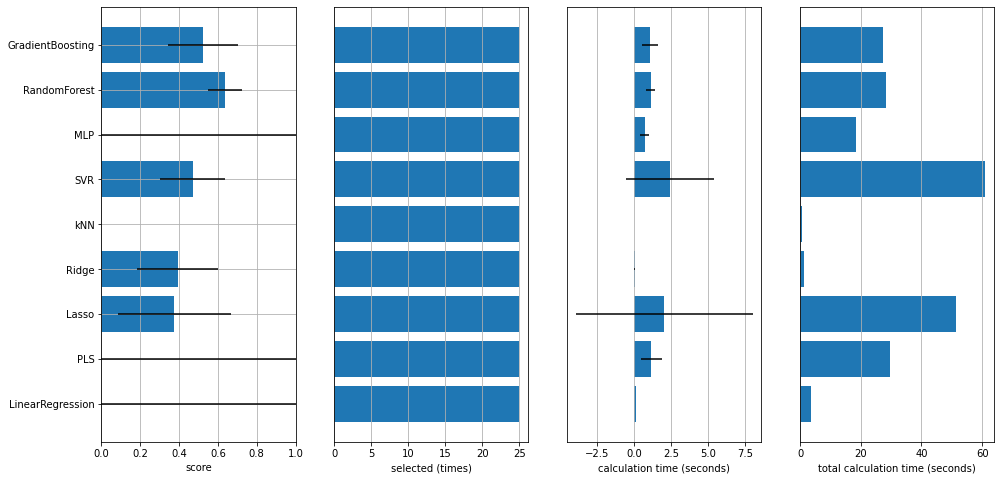

ECFP6


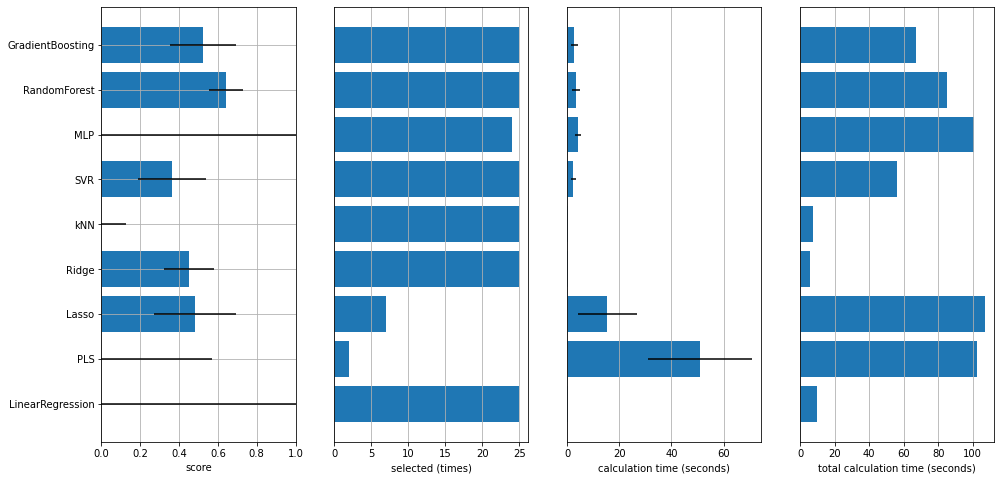

FCFP6


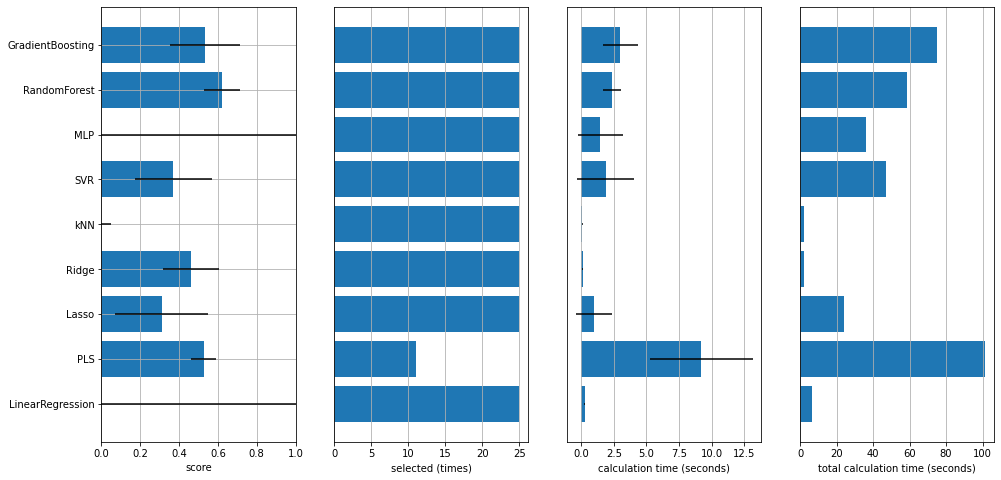

In [ ]:
for objective1, name in zip(
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    all_sklearn.objective_summary(objective1)

RDKit descriptors


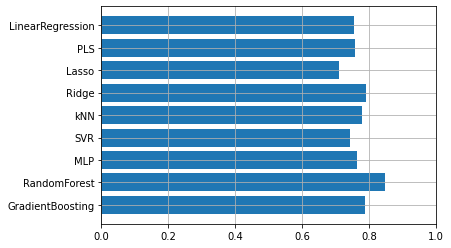

Mordred descriptors


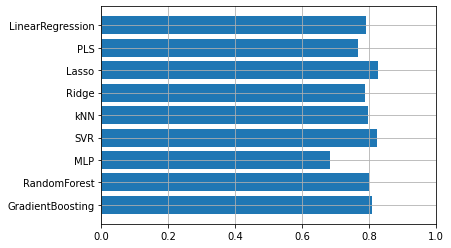

MACCSkeys


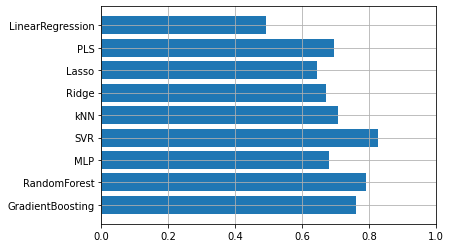

Avalon


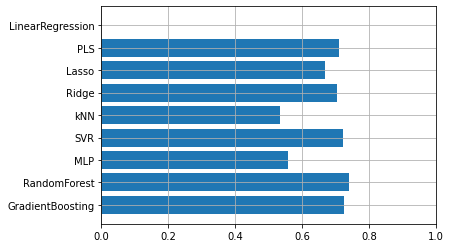

Morgan2(1024bits)


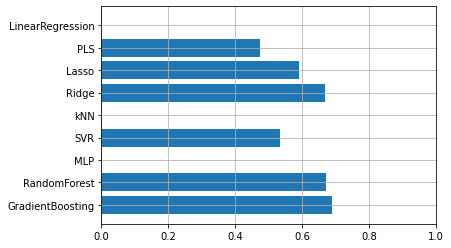

Morgan2F(1024bits)


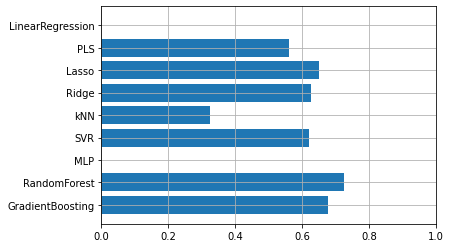

Morgan4(2048bits)


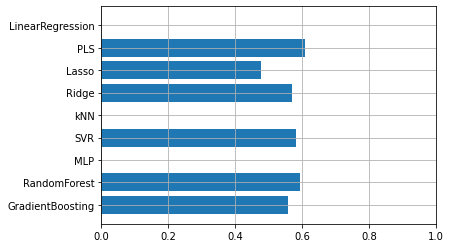

Morgan4F(2048bits)


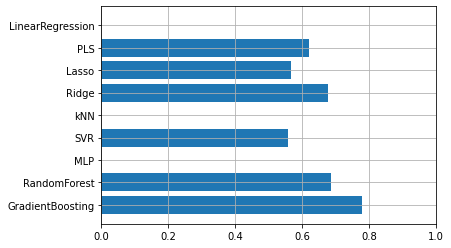

ECFP2


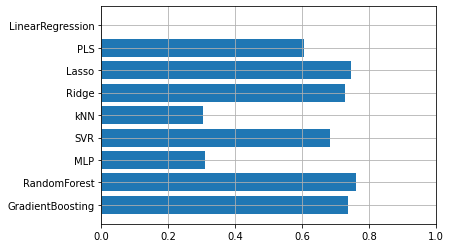

FCFP2


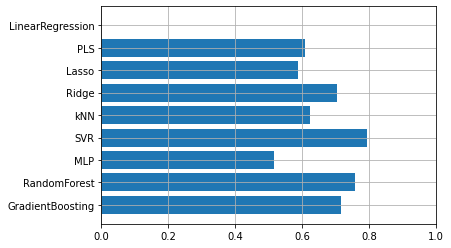

ECFP4


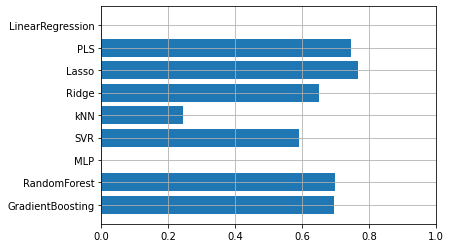

FCFP4


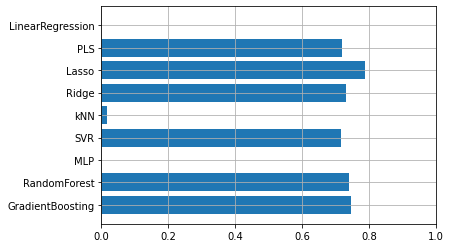

ECFP6


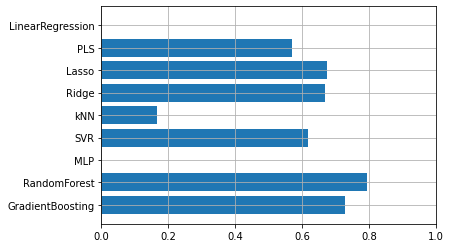

FCFP6


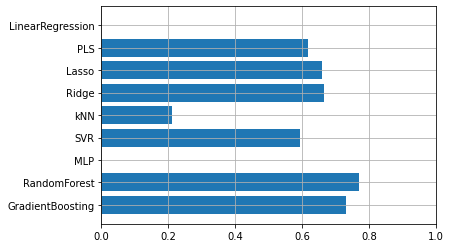

In [ ]:
import matplotlib.pyplot as plt
for objective1, name in zip(
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    plt.barh([x for x in range(len(objective1.best_scores.items()))], list(objective1.best_scores.values()), tick_label=list(objective1.best_scores.keys()))
    plt.xlim([0, 1])
    plt.grid()
    plt.show()

RDKit descriptors


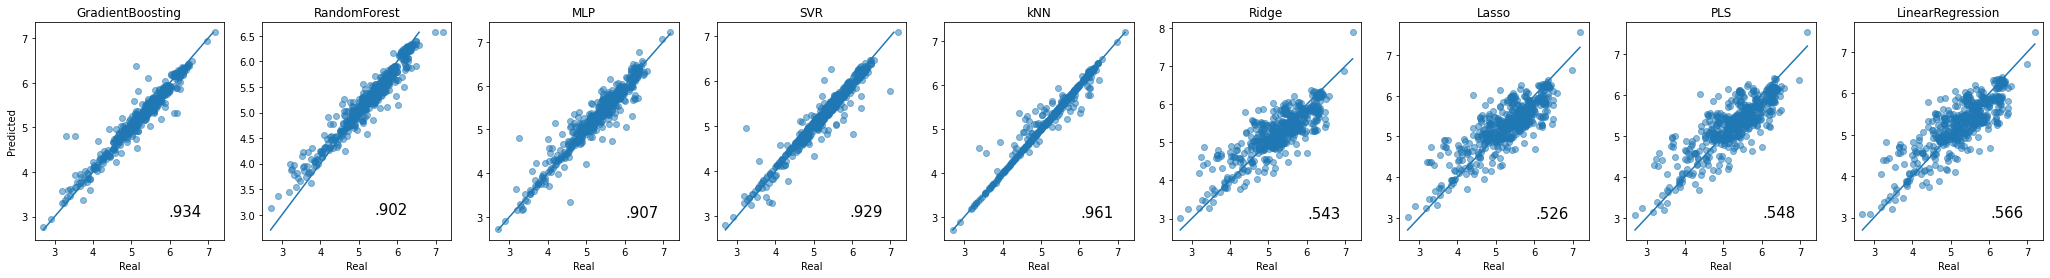

Mordred descriptors


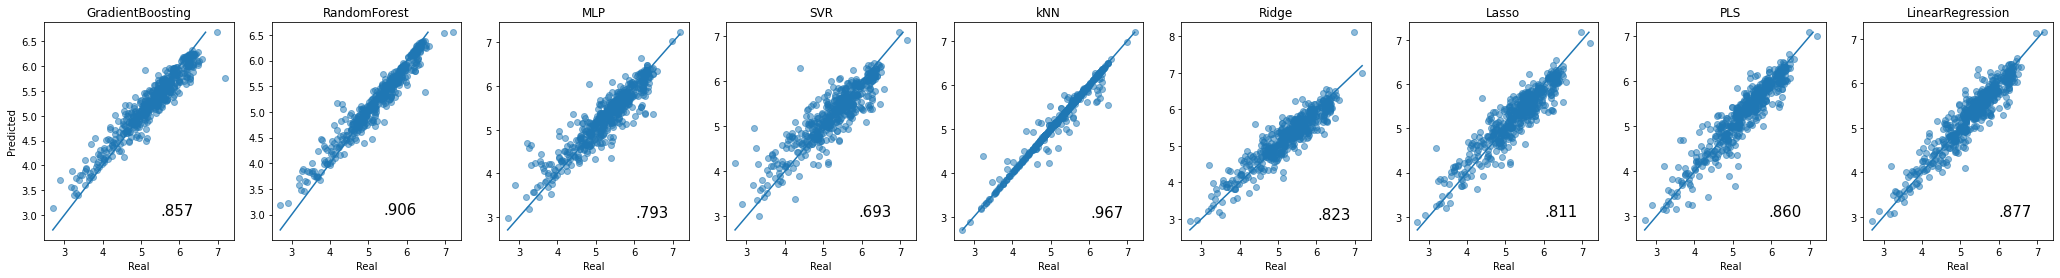

MACCSkeys


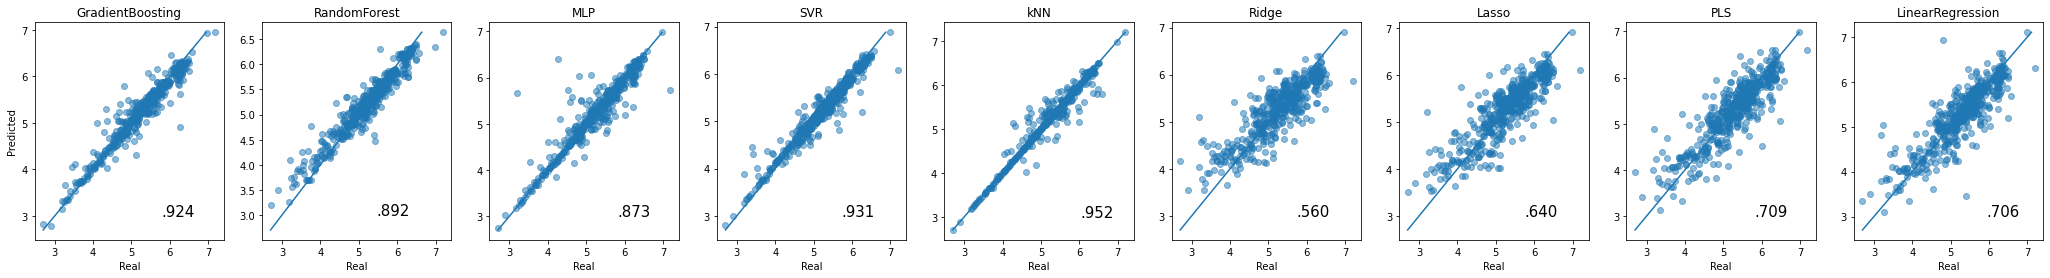

Avalon


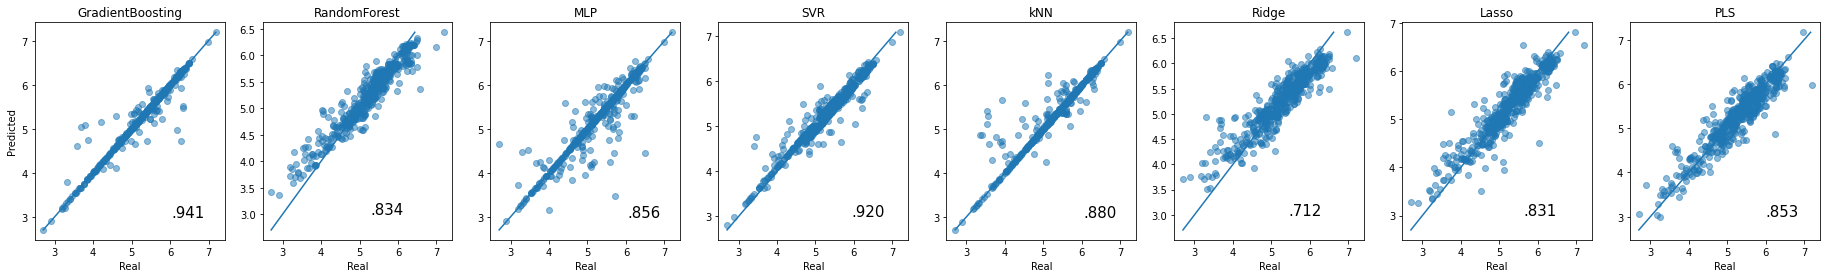

Morgan2(1024bits)


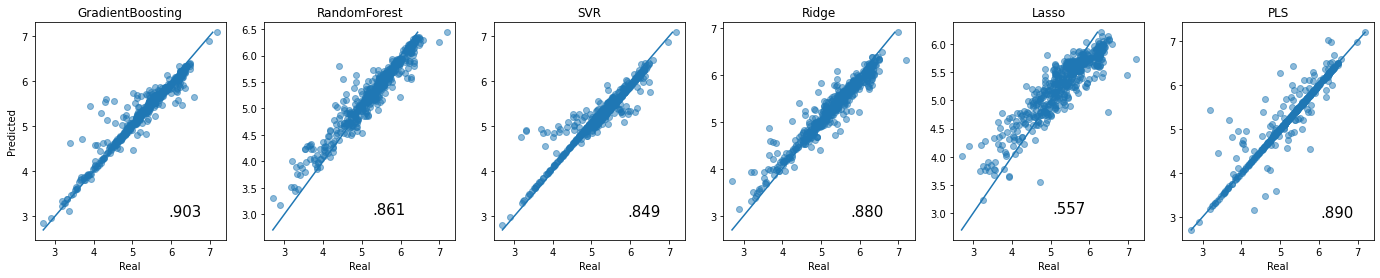

Morgan2F(1024bits)


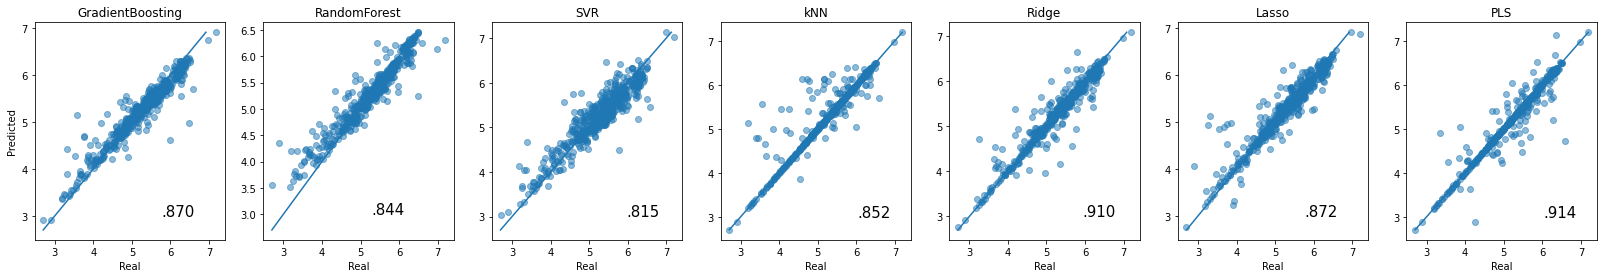

Morgan4(2048bits)


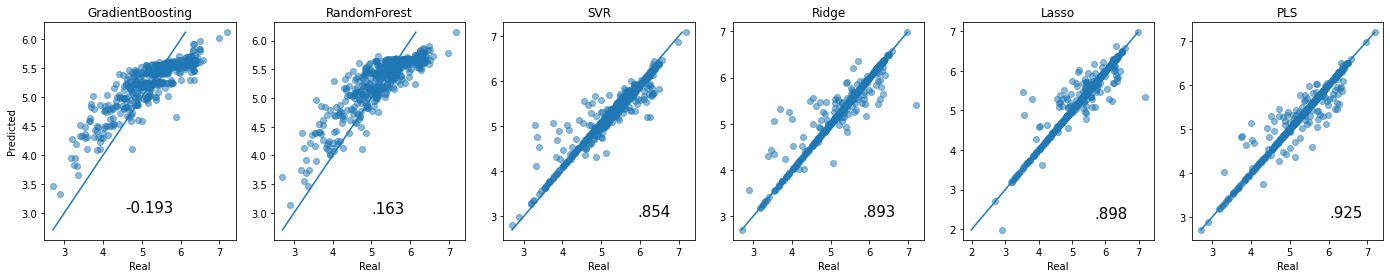

Morgan4F(2048bits)


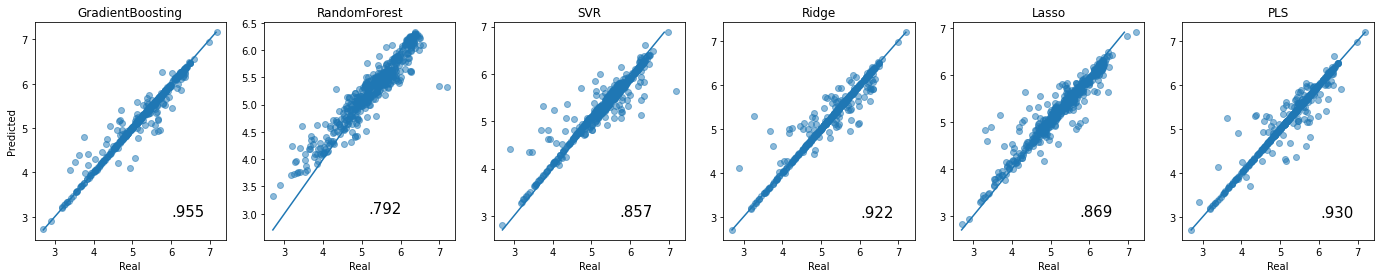

ECFP2


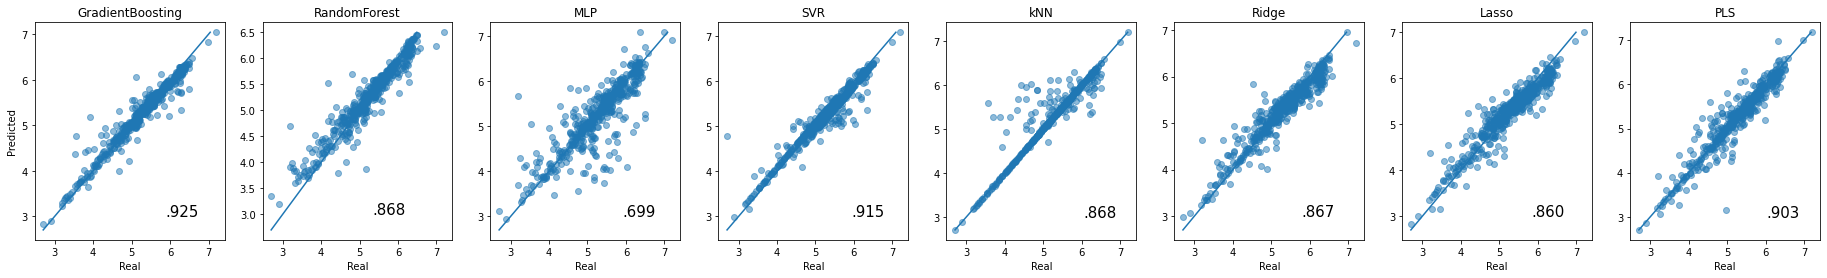

FCFP2


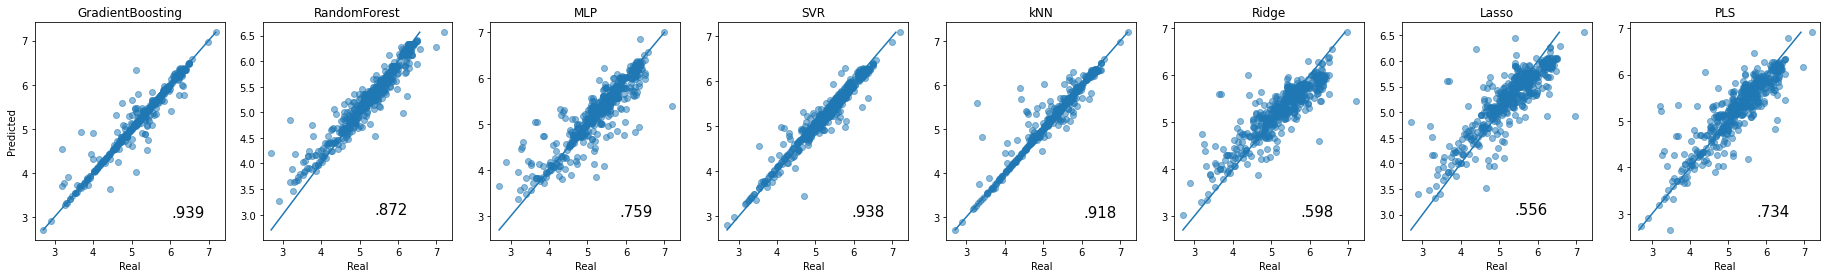

ECFP4


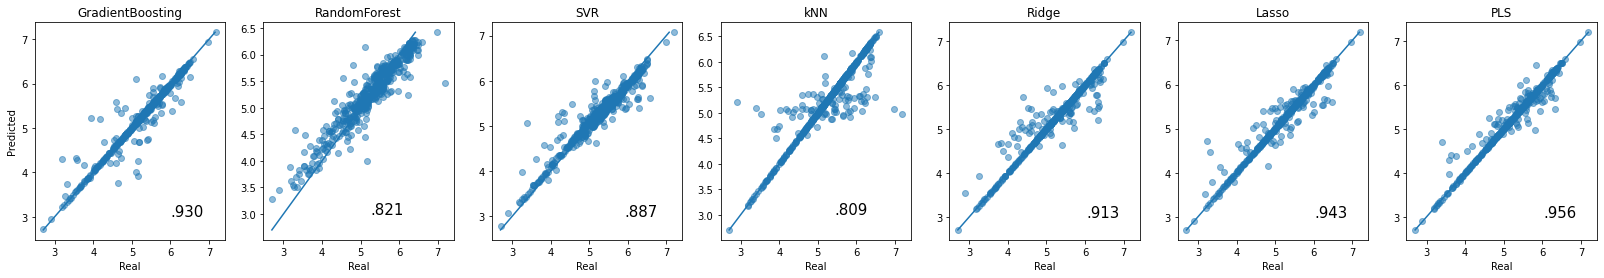

FCFP4


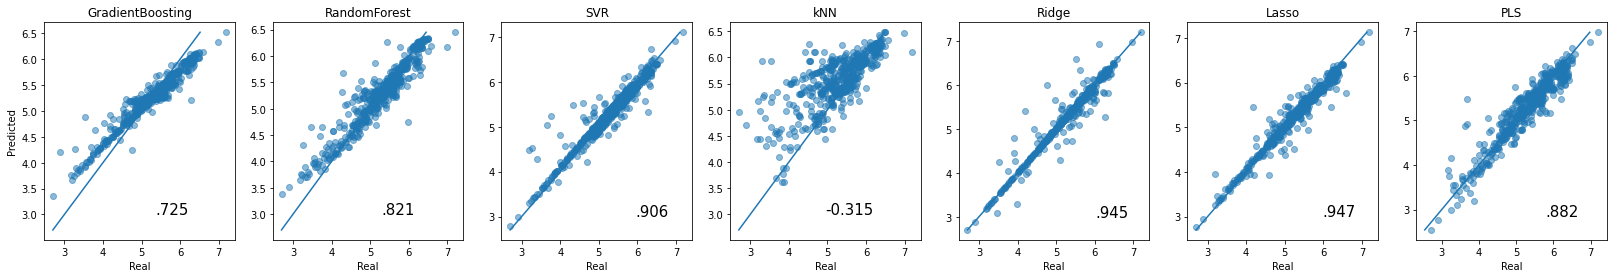

ECFP6


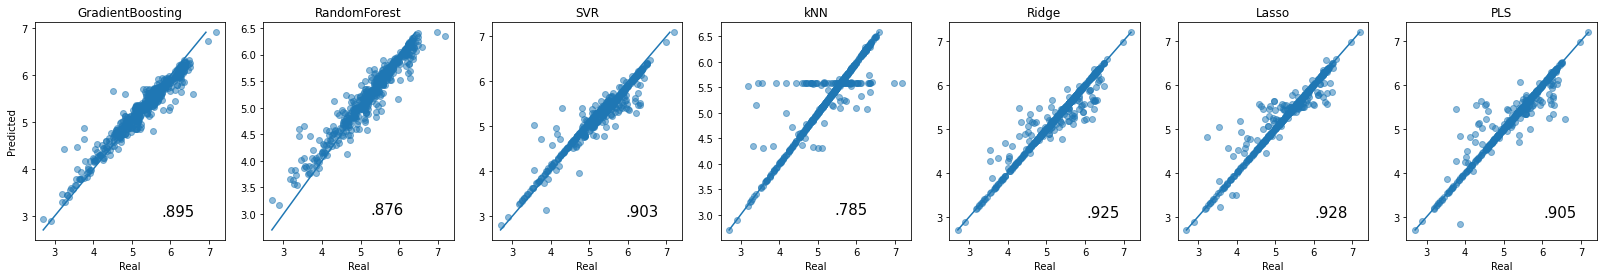

FCFP6


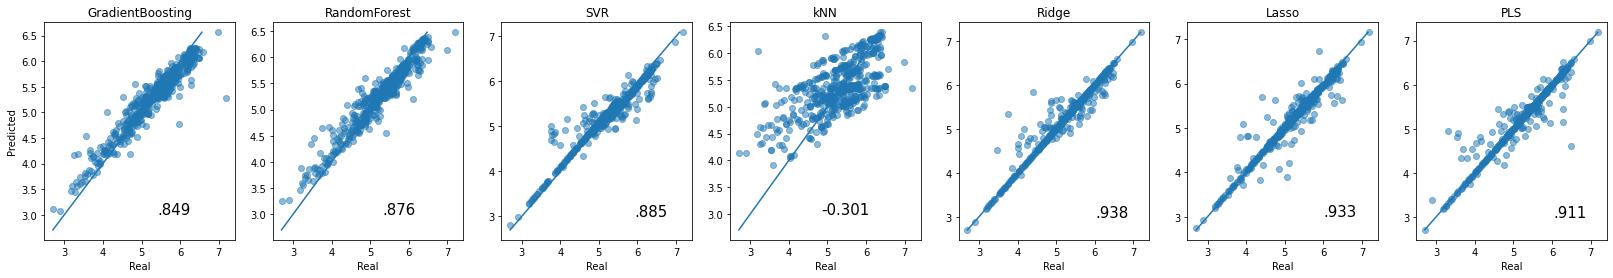

In [ ]:
for X_train1, X_test1, objective1, name in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    objective1.set_model_names(model_names)
    all_sklearn.show_allsklearn_metrics(objective1, X_train1, y_train['HOMO-LUMO gap'])

RDKit descriptors


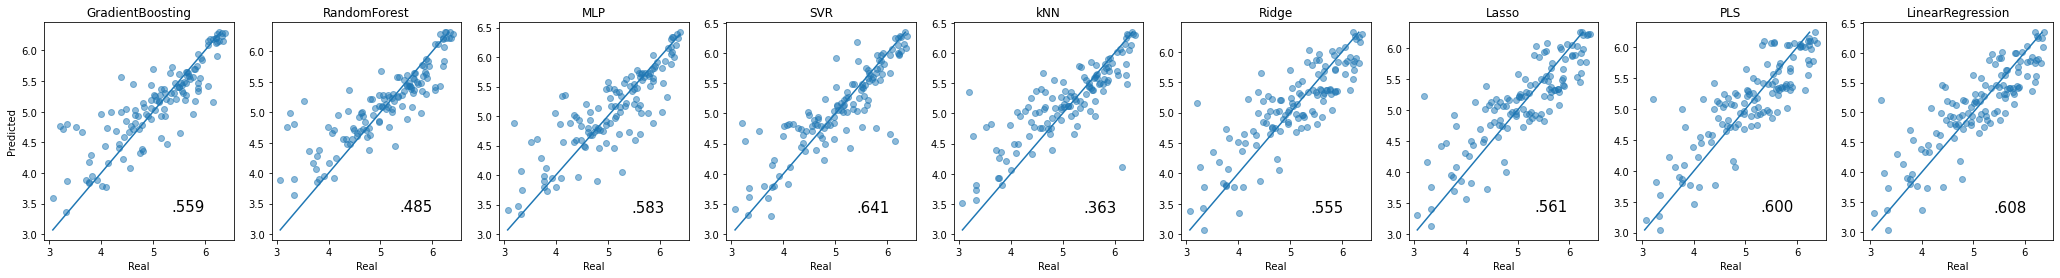

Mordred descriptors


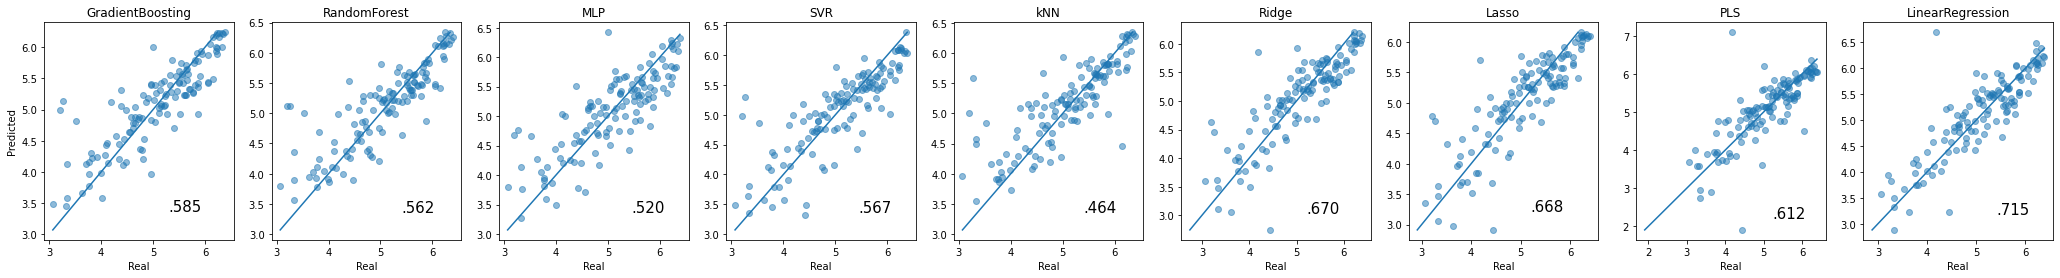

MACCSkeys


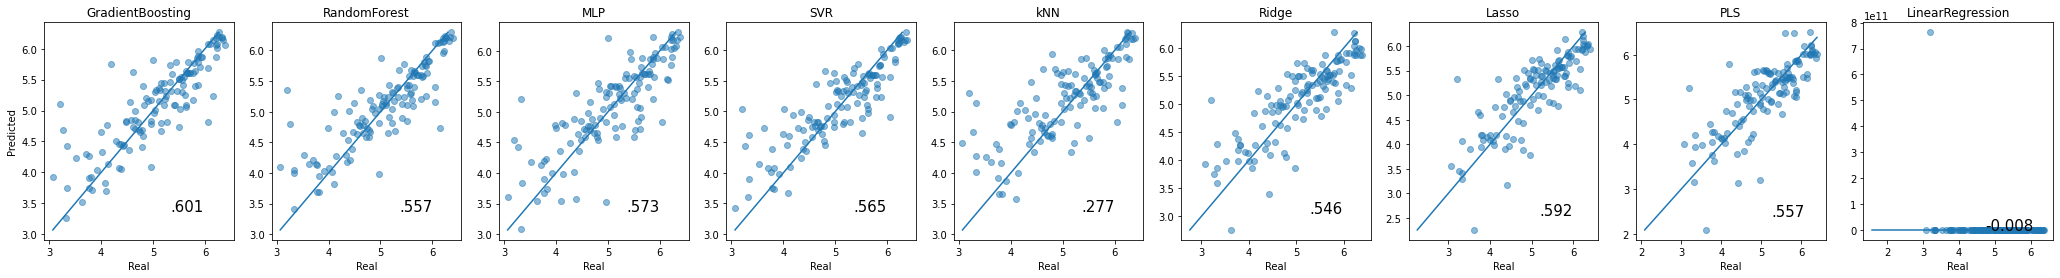

Avalon


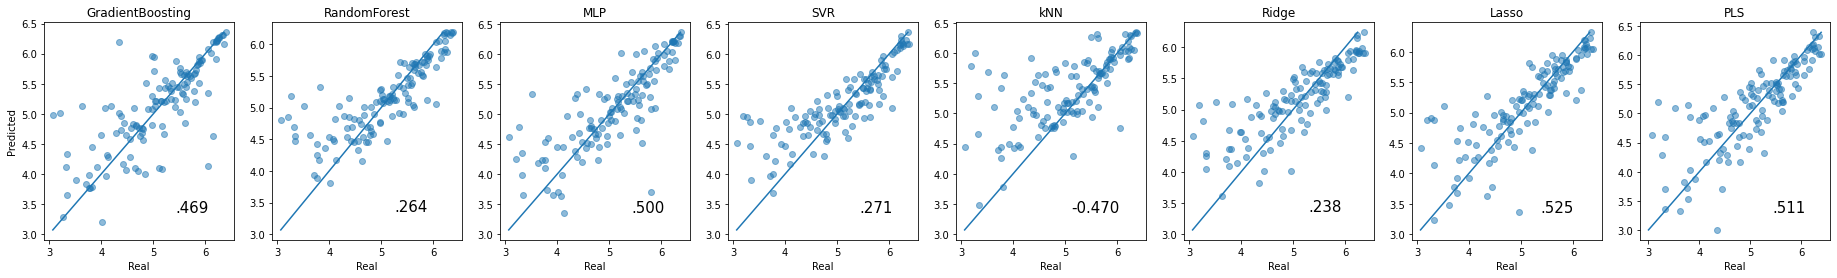

Morgan2(1024bits)


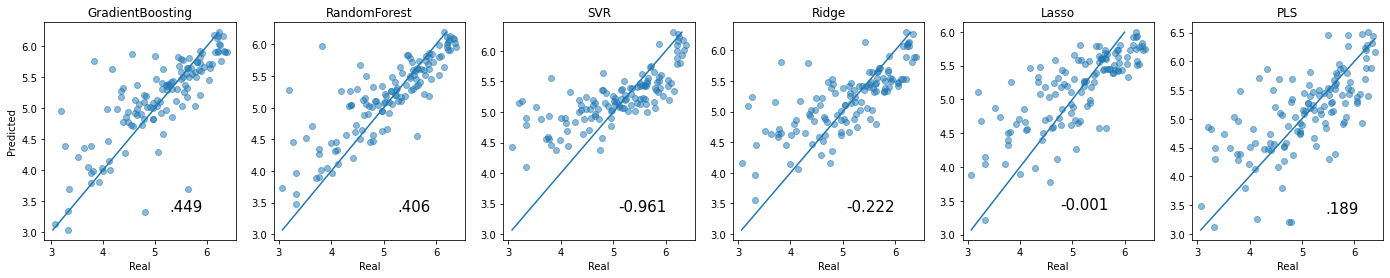

Morgan2F(1024bits)


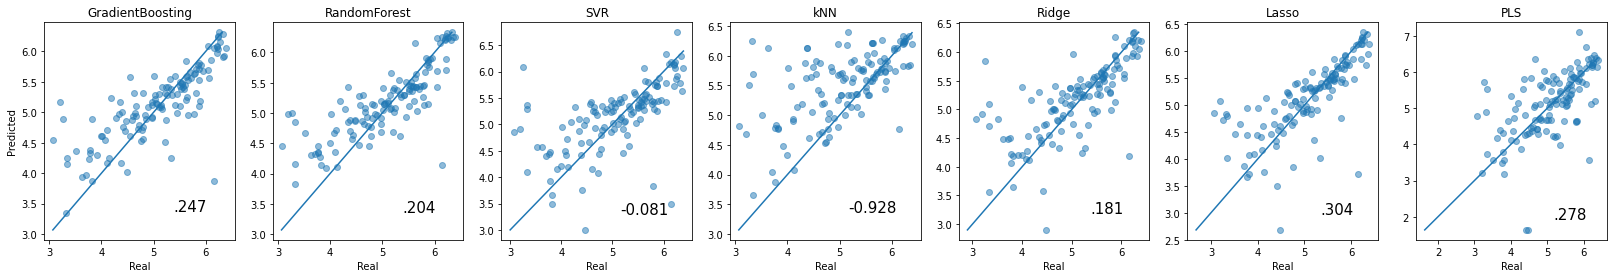

Morgan4(2048bits)


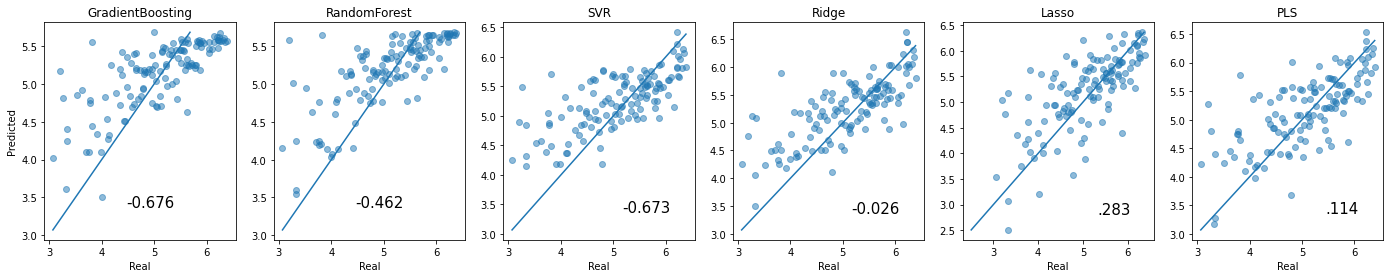

Morgan4F(2048bits)


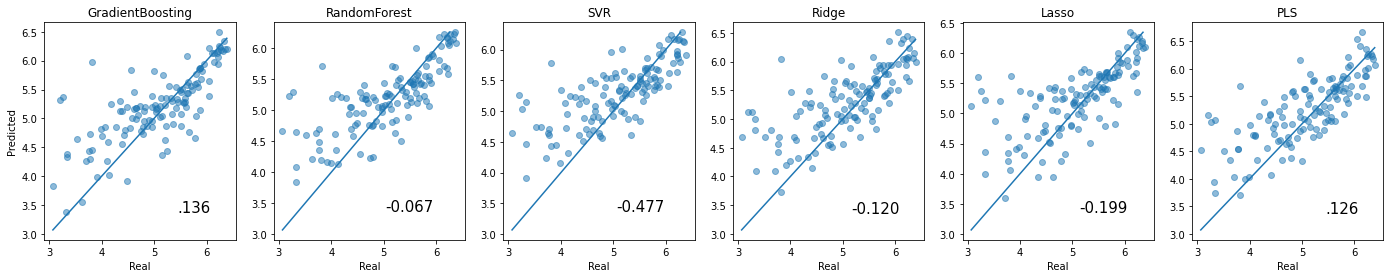

ECFP2


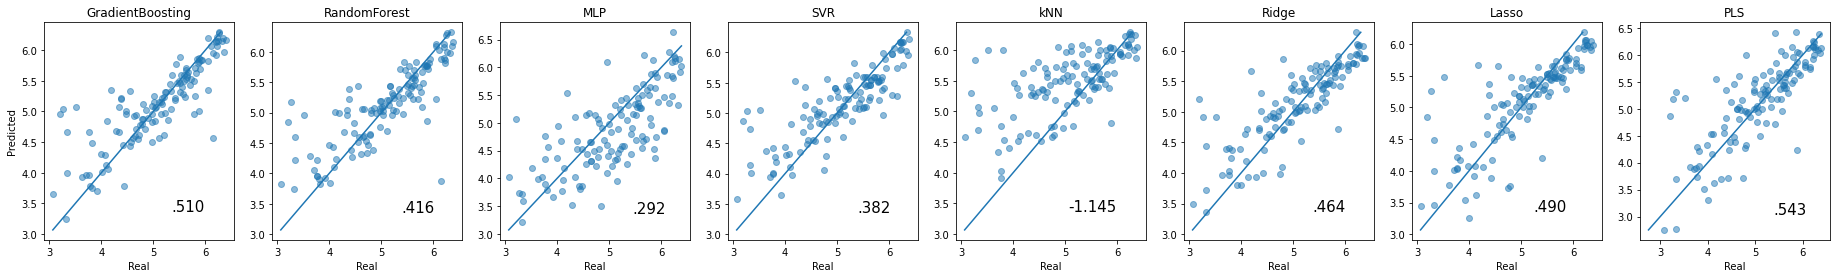

FCFP2


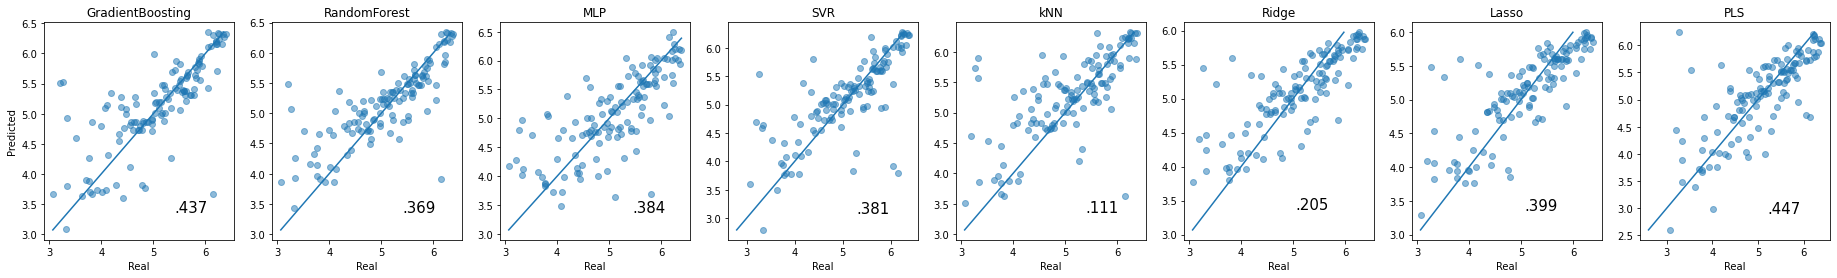

ECFP4


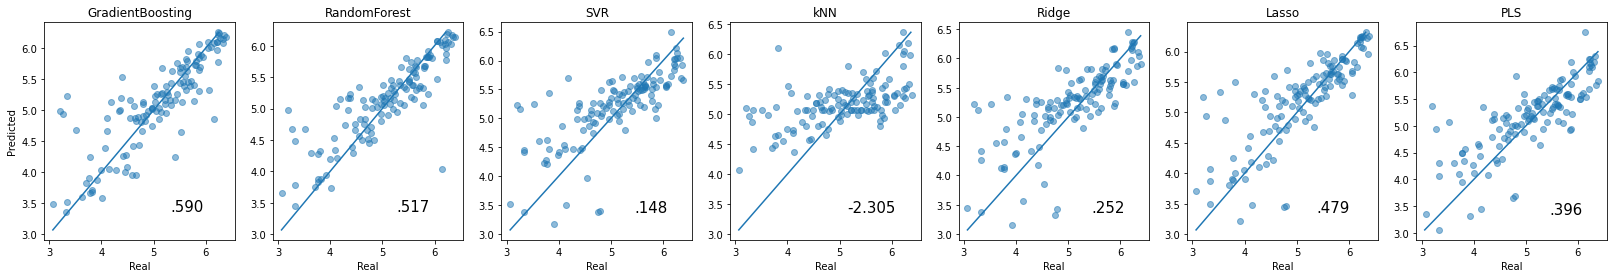

FCFP4


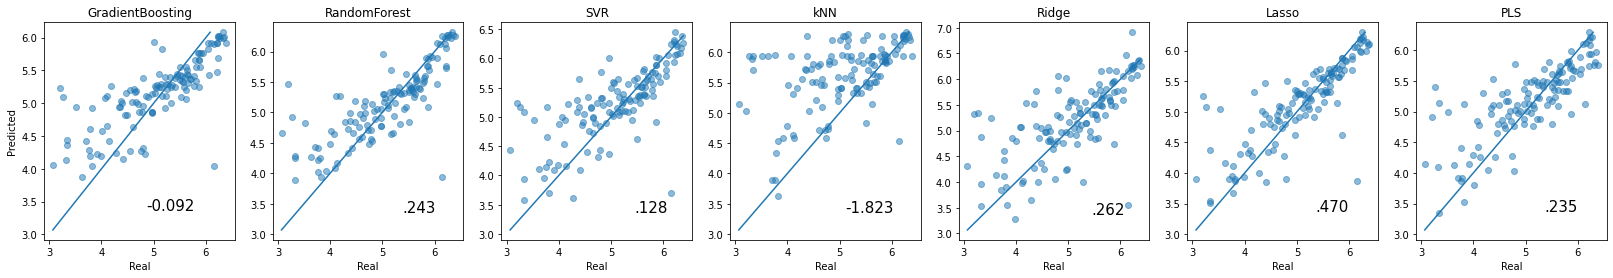

ECFP6


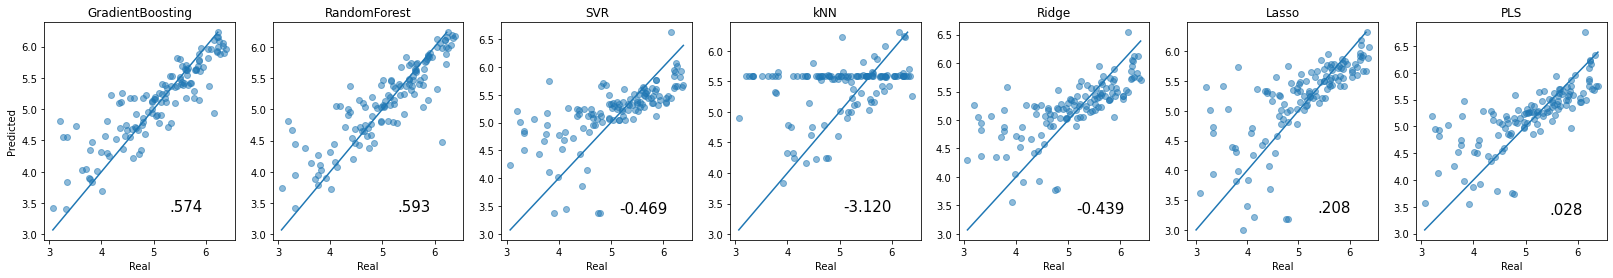

FCFP6


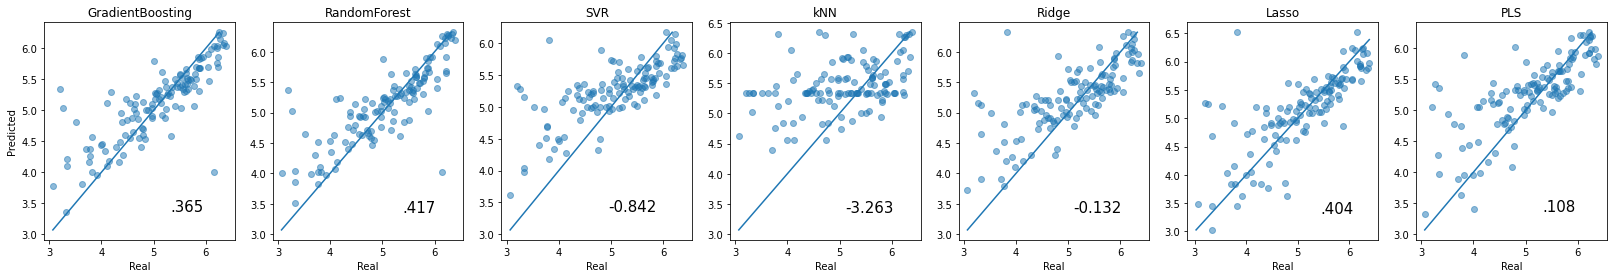

In [ ]:
for X_train1, X_test1, objective1, name in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names()
    ):
    print(name)
    objective1.set_model_names(model_names)
    all_sklearn.show_allsklearn_metrics(objective1, X_test1, y_test['HOMO-LUMO gap'])

In [ ]:
!date

Thu Feb 18 04:03:58 UTC 2021


In [ ]:
stacking_model1s = []

names4barh = []
scores4barh = []
for X_train1, X_test1, objective1, name, pcaumap1 in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names(), 
    pcaumap1s
    ):

    stacking_model1 = all_sklearn.stacking(objective1)
    stacking_model1.fit(X_train1, y_train['HOMO-LUMO gap'])
    score = stacking_model1.score(X_test1, y_test['HOMO-LUMO gap'])
    print(name, X_train1.shape, score)
    names4barh.append(name)
    scores4barh.append(score)
    stacking_model1s.append(stacking_model1)

RDKit descriptors (506, 25) 0.7736896193660885
Mordred descriptors (506, 152) 0.7607652122281306
MACCSkeys (506, 128) 0.7103348489187316
Avalon (506, 508) 0.6753772730508785
Morgan2(1024bits) (506, 889) 0.7211896489381788


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Morgan2F(1024bits) (506, 681) 0.6454769356152708


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 502

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403



Morgan4(2048bits) (506, 1815) 0.6615471506116557
Morgan4F(2048bits) (506, 1667) 0.5898416196732069
ECFP2 (506, 585) 0.7876205905431393
FCFP2 (506, 193) 0.7084066912370122


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 492

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 397

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 396

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 399

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 402



ECFP4 (506, 2173) 0.7283763736446764


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=530000).  Consider pre-processing your data with StandardScaler or MinMa

FCFP4 (506, 1053) 0.6955609671397447
ECFP6 (506, 3806) 0.710832011580355


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 498

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 398

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 400

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 401

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning:

X scores are null at iteration 403



FCFP6 (506, 2727) 0.6683553025386275


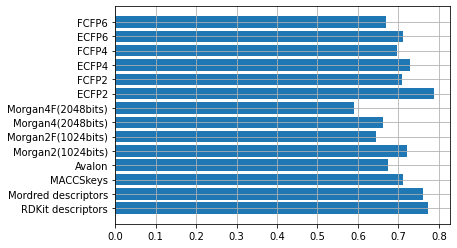

In [ ]:
plt.barh(names4barh, scores4barh)
plt.grid()
plt.show()

(506, 25)
RDKit descriptors best_model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


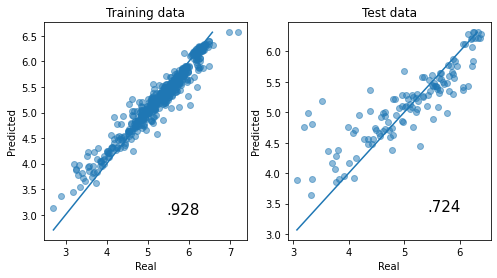

RDKit descriptors stacking_model


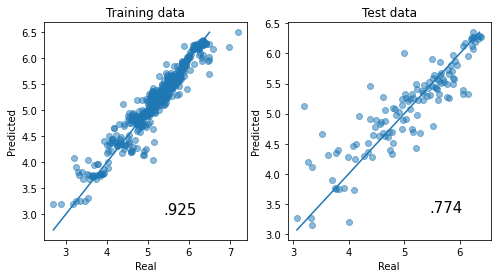

(506, 152)
Mordred descriptors best_model Lasso(alpha=0.0019141453213133545, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


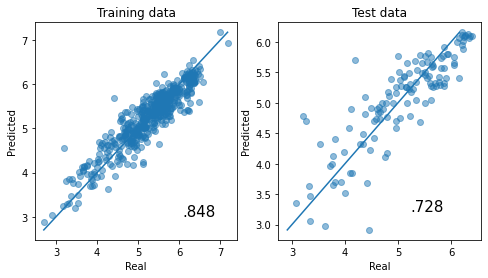

Mordred descriptors stacking_model


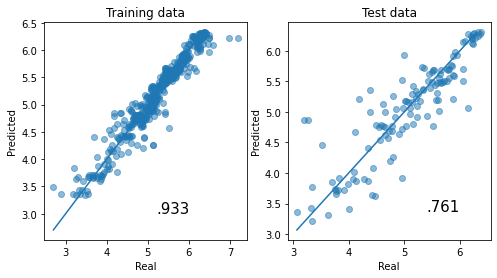

(506, 128)
MACCSkeys best_model SVR(C=2.744909611578713, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='rbf', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


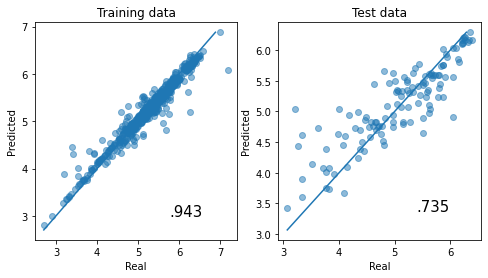

MACCSkeys stacking_model


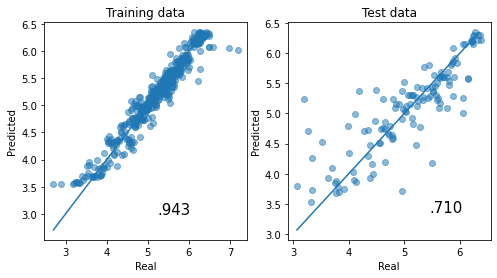

(506, 508)
Avalon best_model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


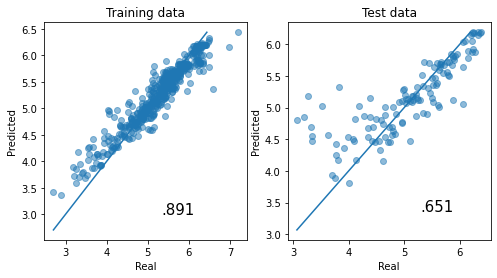

Avalon stacking_model


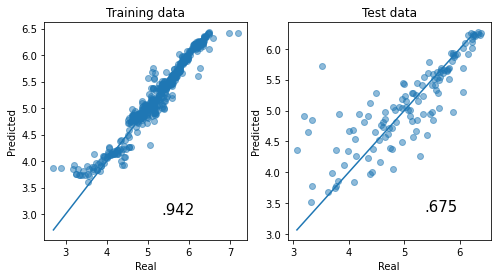

(506, 889)
Morgan2(1024bits) best_model GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05812656004166368,
                          loss='ls', max_depth=10, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


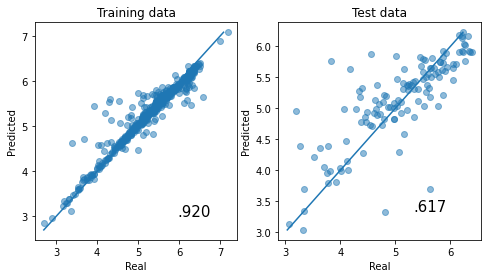

Morgan2(1024bits) stacking_model


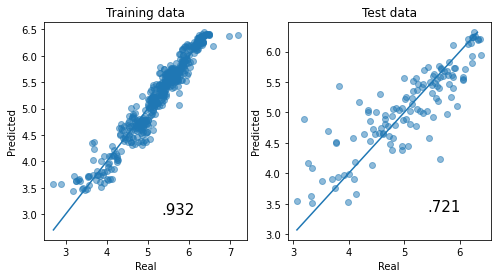

(506, 681)
Morgan2F(1024bits) best_model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


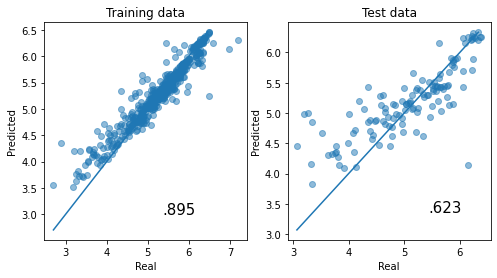

Morgan2F(1024bits) stacking_model


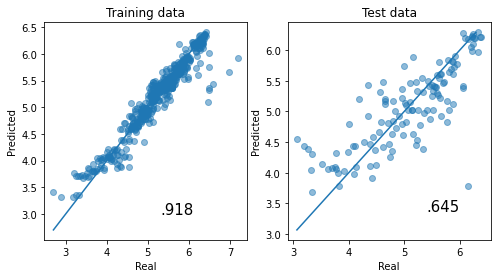

(506, 1815)
Morgan4(2048bits) best_model PLSRegression(copy=True, max_iter=530000, n_components=1447, scale=True,
              tol=1e-06)


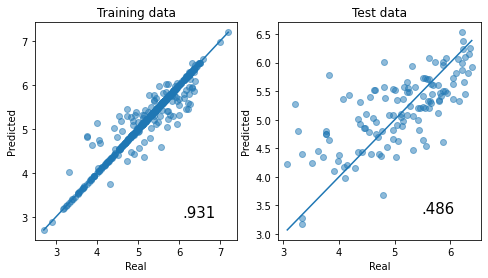

Morgan4(2048bits) stacking_model


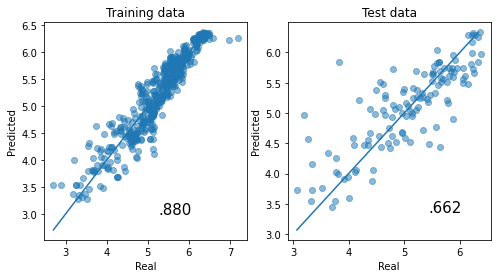

(506, 1667)
Morgan4F(2048bits) best_model GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.0947781411112224,
                          loss='ls', max_depth=12, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


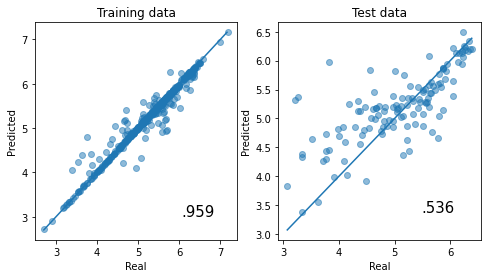

Morgan4F(2048bits) stacking_model


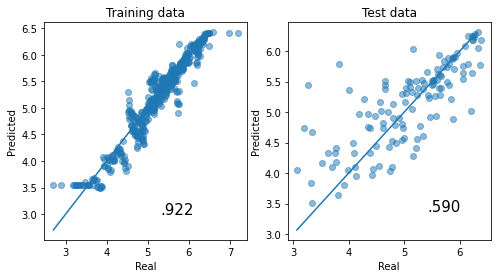

(506, 585)
ECFP2 best_model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


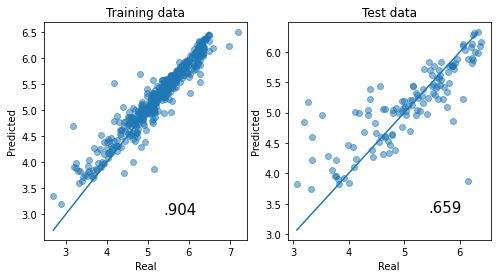

ECFP2 stacking_model


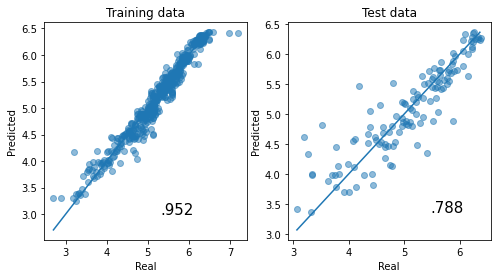

(506, 193)
FCFP2 best_model SVR(C=25.647327404132426, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='rbf', max_iter=530000, shrinking=True, tol=0.001,
    verbose=False)


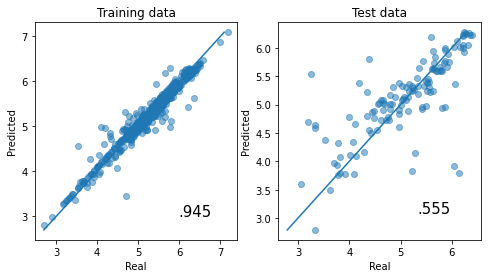

FCFP2 stacking_model


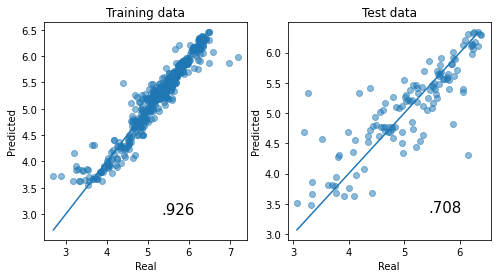

(506, 2173)
ECFP4 best_model Lasso(alpha=0.0003989386551800537, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


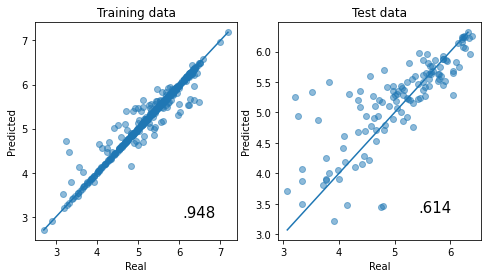

ECFP4 stacking_model


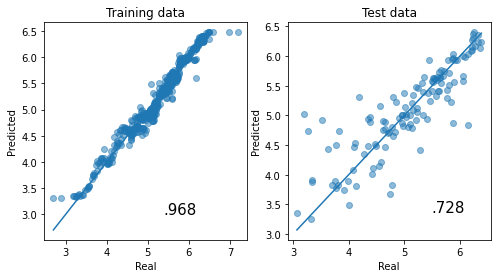

(506, 1053)
FCFP4 best_model Lasso(alpha=0.003973768011940373, copy_X=True, fit_intercept=True,
      max_iter=530000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


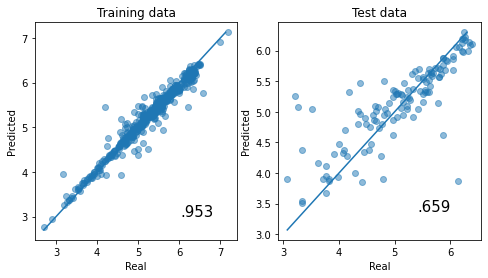

FCFP4 stacking_model


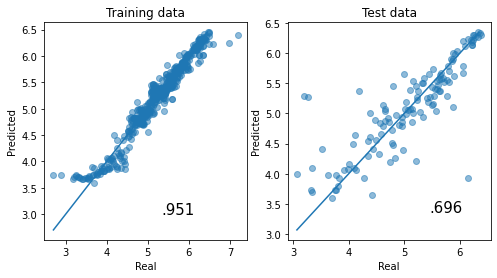

(506, 3806)
ECFP6 best_model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=27, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


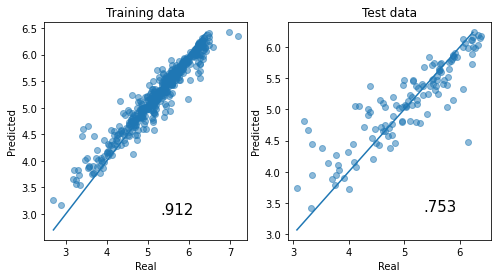

ECFP6 stacking_model


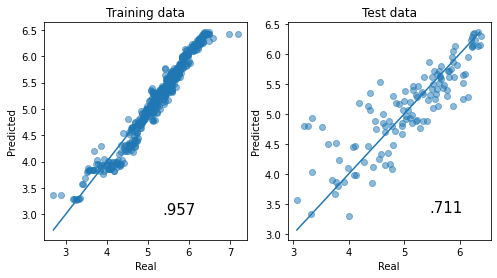

(506, 2727)
FCFP6 best_model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


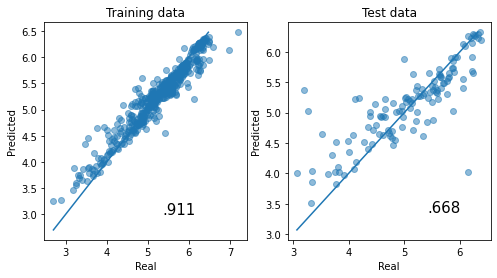

FCFP6 stacking_model


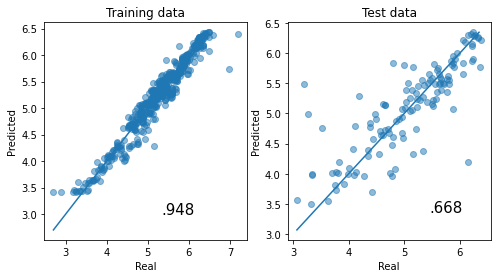

In [ ]:
for X_train1, X_test1, objective1, name, pcaumap1, stacking_model1 in zip(
    [X_train_rdkit1, X_train_mordred1] + X_trains1_selected, 
    [X_test_rdkit1, X_test_mordred1] + X_tests1_selected, 
    [objective1_rdkit, objective1_mordred] + objective1s, 
    ["RDKit descriptors", "Mordred descriptors"] + fingerprinter.names(), 
    pcaumap1s,
    stacking_model1s
    ):
    print(X_train1.shape)
    print(name, "best_model", objective1.best_model.model)
    all_sklearn.show_metrics(objective1.best_model.model, X_train1, X_test1, y_train['HOMO-LUMO gap'], y_test['HOMO-LUMO gap'])
    print(name, "stacking_model")
    all_sklearn.show_metrics(stacking_model1, X_train1, X_test1, y_train['HOMO-LUMO gap'], y_test['HOMO-LUMO gap'])

In [ ]:
!date

Thu Feb 18 04:15:58 UTC 2021
